<a href="https://colab.research.google.com/github/Zircornn-Black/Phase-1-Independent-Project/blob/main/Phase_1_Project_PK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Phase 1 Independent Project Notebook**


*   Name : Purity Kibaki
*   Type : Data Analysis using python

# Loading Data and importing necessary python libraries

In [142]:
#Importing Python Libraries needed for the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests

In [143]:
# List of file names
file_names = ['bom.movie_gross.csv.gz', 'imdb.name.basics.csv.gz', 'imdb.title.akas.csv.gz', 'imdb.title.basics.csv.gz',
              'imdb.title.crew.csv.gz', 'imdb.title.principals.csv.gz', 'imdb.title.ratings.csv.gz', 'tmdb.movies.csv.gz',
              'tn.movie_budgets.csv.gz', 'rt.movie_info.tsv.gz']

# Loading CSV files into Pandas DataFrames
data = {}  # Dictionary to store DataFrames

for file_name in file_names:
    if file_name.endswith('.tsv.gz'):
        data[file_name.split('.')[0]] = pd.read_csv(file_name, sep='\t')
    else:
        data[file_name.split('.')[0]] = pd.read_csv(file_name)

# Displaying the first few rows of each DataFrame
for key, df in data.items():
    print(f"DataFrame: {key}")
    display(df.head())
    print('\n')

DataFrame: bom


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010




DataFrame: imdb


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21




DataFrame: tmdb


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186




DataFrame: tn


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"




DataFrame: rt


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [144]:
df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


# Data Preparation and Cleaning

In [145]:
#Data preparation and cleaning
#1. Handling(checking) Missing Values
for key, value in data.items():
    print(f"Missing values in {key}:")
    print(value.isnull().sum())

Missing values in bom:
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64
Missing values in imdb:
tconst           0
averagerating    0
numvotes         0
dtype: int64
Missing values in tmdb:
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64
Missing values in tn:
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64
Missing values in rt:
id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64


In [146]:
# Merging the data into a DataFrame called df1
df1 = pd.concat(data.values(), axis=1)
# 2. Removing duplicate entries
df1.drop_duplicates(inplace=True)
# Displaying the first few rows of df1
display(df1.head())

,title,studio,domestic_gross,foreign_gross,year,tconst,averagerating,numvotes,Unnamed: 0,genre_ids,...,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,Toy Story 3,BV,415000000.0,652000000,2010.0,tt10356526,8.3,31,0.0,"[12, 14, 10751]",...,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010.0,tt10384606,8.9,559,1.0,"[14, 12, 16, 10751]",...,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010.0,tt1042974,6.4,20,2.0,"[12, 28, 878]",...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,Inception,WB,292600000.0,535700000,2010.0,tt1043726,4.2,50352,3.0,"[16, 35, 10751]",...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,Shrek Forever After,P/DW,238700000.0,513900000,2010.0,tt1060240,6.5,21,4.0,"[28, 878, 12]",...,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [147]:
# 3. Merging all the dataframes within the df dictionary based on common columns
# Convert the first dataframe in df to a DataFrame
merged_df = pd.DataFrame(df1[list(df.keys())[0]])

# Merge the remaining dataframes with the first one
for key in list(df1.keys())[1:]:
    # Convert the next dataframe to a DataFrame
    next_df = pd.DataFrame(df1[key])

    # Concatenate the dataframes along the columns
    merged_df = pd.concat([merged_df, next_df], axis=1, join='outer')

The above code will concatenate all the dataframes in the 'df' dictionary along the columns.
The resulting merged dataframe will contain all the relevant data from the original dataframes.

In [148]:
#Missing values in the whole dataset summary
print("Missing values in the dataframe:")
print(df1.isnull().sum())

Missing values in the dataframe:
title                70469
studio               70474
domestic_gross       70497
foreign_gross        71819
year                 70469
tconst                   0
averagerating            0
numvotes                 0
Unnamed: 0           47339
genre_ids            47339
id                   47339
original_language    47339
original_title       47339
popularity           47339
release_date         47339
title                47339
vote_average         47339
vote_count           47339
id                   68074
release_date         68074
movie                68074
production_budget    68074
domestic_gross       68074
worldwide_gross      68074
id                   72296
synopsis             72358
rating               72299
genre                72304
director             72495
writer               72745
theater_date         72655
dvd_date             72655
currency             73516
box_office           73516
runtime              72326
studio               7

In [149]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3387 non-null   object 
 1   studio             3382 non-null   object 
 2   domestic_gross     3359 non-null   float64
 3   foreign_gross      2037 non-null   object 
 4   year               3387 non-null   float64
 5   tconst             73856 non-null  object 
 6   averagerating      73856 non-null  float64
 7   numvotes           73856 non-null  int64  
 8   Unnamed: 0         26517 non-null  float64
 9   genre_ids          26517 non-null  object 
 10  id                 26517 non-null  float64
 11  original_language  26517 non-null  object 
 12  original_title     26517 non-null  object 
 13  popularity         26517 non-null  float64
 14  release_date       26517 non-null  object 
 15  title              26517 non-null  object 
 16  vote_average       265

In [150]:
#Summary stats for the merged dataframe
print(merged_df.describe())

                  id           id           id  domestic_gross         year  \
count   26517.000000  5782.000000  1560.000000    3.359000e+03  3387.000000   
mean   295050.153260    50.372363  1007.303846    2.874585e+07  2013.958075   
std    153661.615648    28.821076   579.164527    6.698250e+07     2.478141   
min        27.000000     1.000000     1.000000    1.000000e+02  2010.000000   
25%    157851.000000    25.000000   504.750000    1.200000e+05  2012.000000   
50%    309581.000000    50.000000  1007.500000    1.400000e+06  2014.000000   
75%    419542.000000    75.000000  1503.250000    2.790000e+07  2016.000000   
max    608444.000000   100.000000  2000.000000    9.367000e+08  2018.000000   

       averagerating      numvotes   Unnamed: 0             id           id  \
count   73856.000000  7.385600e+04  26517.00000   26517.000000  5782.000000   
mean        6.332729  3.523662e+03  13258.00000  295050.153260    50.372363   
std         1.474978  3.029402e+04   7654.94288  15

This shows that we have about five files in our dataset, to easier analysis, we need to merge them into one file.

In [151]:
# Saving the merged file as csv to continue with analysis
merged_df.to_csv('merged_data.csv', index=False)

In [152]:
df1.describe()

,domestic_gross,year,averagerating,numvotes,Unnamed: 0,id,popularity,vote_average,vote_count,id,id
count,3.359000e+03,3387.000000,73856.000000,7.385600e+04,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000,5782.000000,1560.000000
mean,2.874585e+07,2013.958075,6.332729,3.523662e+03,13258.00000,295050.153260,3.130912,5.991281,194.224837,50.372363,1007.303846
std,6.698250e+07,2.478141,1.474978,3.029402e+04,7654.94288,153661.615648,4.355229,1.852946,960.961095,28.821076,579.164527
min,1.000000e+02,2010.000000,1.000000,5.000000e+00,0.00000,27.000000,0.600000,0.000000,1.000000,1.000000,1.000000
25%,1.200000e+05,2012.000000,5.500000,1.400000e+01,6629.00000,157851.000000,0.600000,5.000000,2.000000,25.000000,504.750000
50%,1.400000e+06,2014.000000,6.500000,4.900000e+01,13258.00000,309581.000000,1.374000,6.000000,5.000000,50.000000,1007.500000
75%,2.790000e+07,2016.000000,7.400000,2.820000e+02,19887.00000,419542.000000,3.694000,7.000000,28.000000,75.000000,1503.250000
max,9.367000e+08,2018.000000,10.000000,1.841066e+06,26516.00000,608444.000000,80.773000,10.000000,22186.000000,100.000000,2000.000000


From the above, we can see that we are now working with one file .

In [153]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3387 non-null   object 
 1   studio             3382 non-null   object 
 2   domestic_gross     3359 non-null   float64
 3   foreign_gross      2037 non-null   object 
 4   year               3387 non-null   float64
 5   tconst             73856 non-null  object 
 6   averagerating      73856 non-null  float64
 7   numvotes           73856 non-null  int64  
 8   Unnamed: 0         26517 non-null  float64
 9   genre_ids          26517 non-null  object 
 10  id                 26517 non-null  float64
 11  original_language  26517 non-null  object 
 12  original_title     26517 non-null  object 
 13  popularity         26517 non-null  float64
 14  release_date       26517 non-null  object 
 15  title              26517 non-null  object 
 16  vote_average       265

From the above, we can see that we have some duplicate columns for example studio, we need to drop the duplicates to have a clean dataset

In [154]:
# Remove duplicate columns
df1 = df1.loc[:, ~df1.columns.duplicated()]

# Drop rows with missing values
df1.dropna(inplace=True)

# Show the remaining columns to confirm changes
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 1 to 1545
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              191 non-null    object 
 1   studio             191 non-null    object 
 2   domestic_gross     191 non-null    float64
 3   foreign_gross      191 non-null    object 
 4   year               191 non-null    float64
 5   tconst             191 non-null    object 
 6   averagerating      191 non-null    float64
 7   numvotes           191 non-null    int64  
 8   Unnamed: 0         191 non-null    float64
 9   genre_ids          191 non-null    object 
 10  id                 191 non-null    float64
 11  original_language  191 non-null    object 
 12  original_title     191 non-null    object 
 13  popularity         191 non-null    float64
 14  release_date       191 non-null    object 
 15  vote_average       191 non-null    float64
 16  vote_count         191 no

6 duplicate columns have been dropped since we now have 30 coluns from 36 columns

# Data Analysis and Visualization

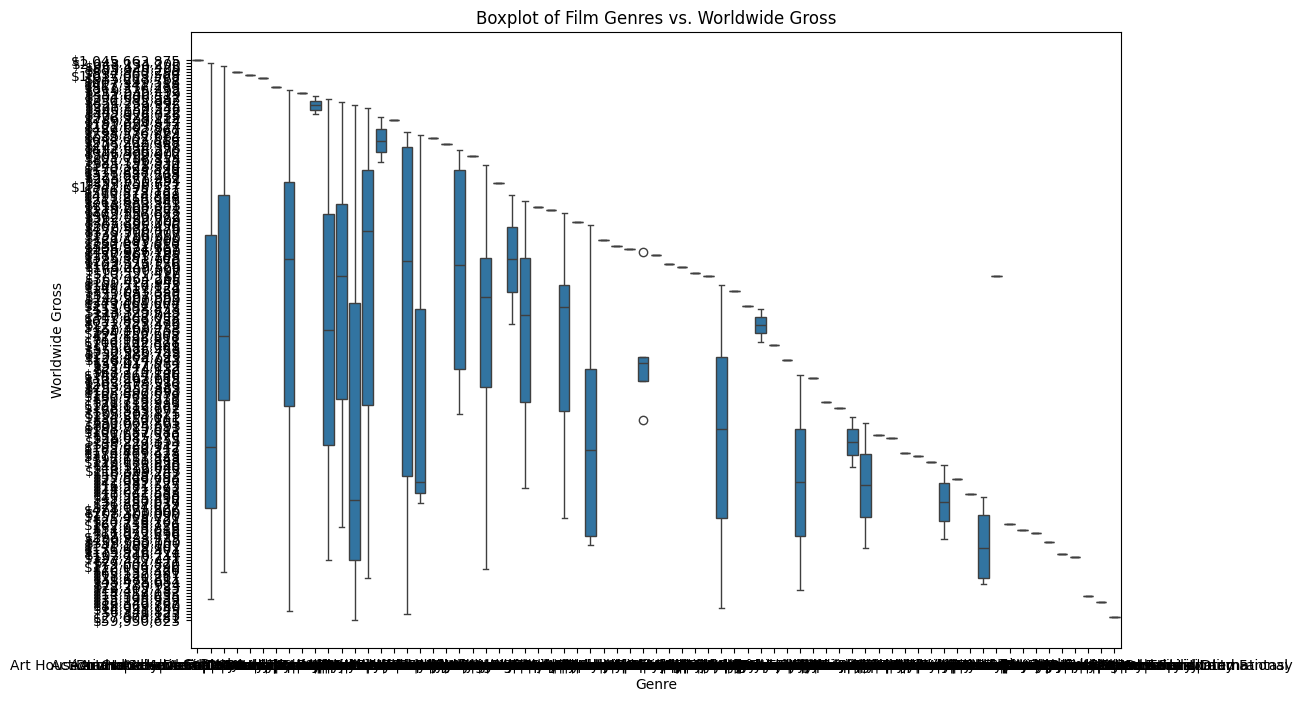

In [155]:
#Boxplot of film genres against worldwide gross to check data consistency
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre', y='worldwide_gross', data=df1)
plt.xlabel('Genre')
plt.ylabel('Worldwide Gross')
plt.title('Boxplot of Film Genres vs. Worldwide Gross')
plt.show()

From the above, our data has very few outliers thus we can proceed to use the data for our analysis.

In [156]:
# Checking numerical values in df1
numerical_columns = []
for column in df1.columns:
    if pd.api.types.is_numeric_dtype(df1[column]):
        numerical_columns.append(column)

print("Numerical Columns in df1:")
print(numerical_columns)

Numerical Columns in df1:
['domestic_gross', 'year', 'averagerating', 'numvotes', 'Unnamed: 0', 'id', 'popularity', 'vote_average', 'vote_count']


In [157]:
# Identify columns with no values
columns_with_no_values = df1.columns[df1.isnull().all()]
# Show columns with no values
print("columns with no values:")
print(columns_with_no_values)

columns with no values:
Index([], dtype='object')


In [158]:
df1.head()

,title,studio,domestic_gross,foreign_gross,year,tconst,averagerating,numvotes,Unnamed: 0,genre_ids,...,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010.0,tt10384606,8.9,559,1.0,"[14, 12, 16, 10751]",...,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes
6,Iron Man 2,Par.,312400000.0,311500000,2010.0,tt1094666,7.0,1613,6.0,"[28, 12, 14, 878]",...,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes
7,Tangled,BV,200800000.0,391000000,2010.0,tt1130982,6.4,571,7.0,"[16, 10751, 35]",...,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes
8,Despicable Me,Uni.,251500000.0,291600000,2010.0,tt1156528,7.2,265,8.0,"[16, 10751, 35]",...,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes
15,Prince of Persia: The Sands of Time,BV,90800000.0,245600000,2010.0,tt1204784,5.8,6,15.0,"[12, 14, 18, 10749]",...,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes


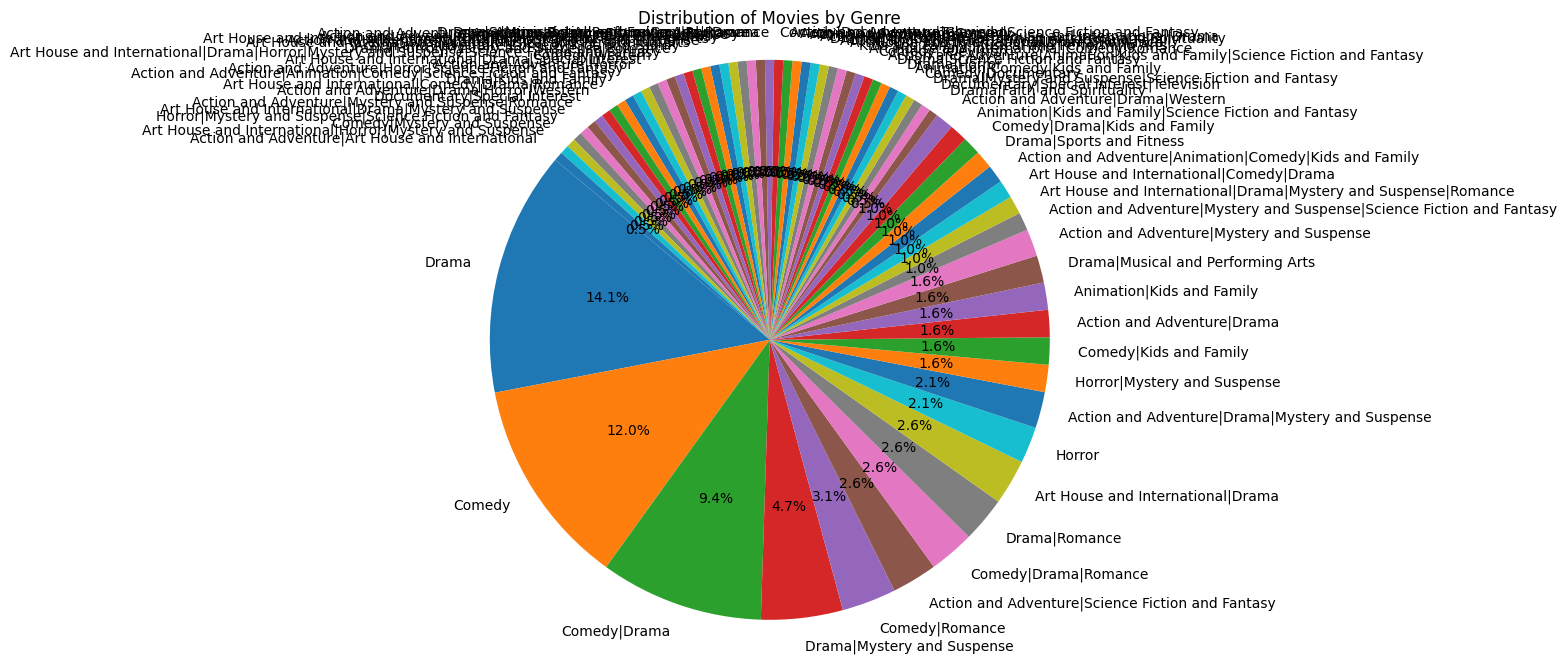

In [159]:
# To plot a pie chart to show movies based on genre
genre_counts = df1['genre'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Movies by Genre')
plt.show()

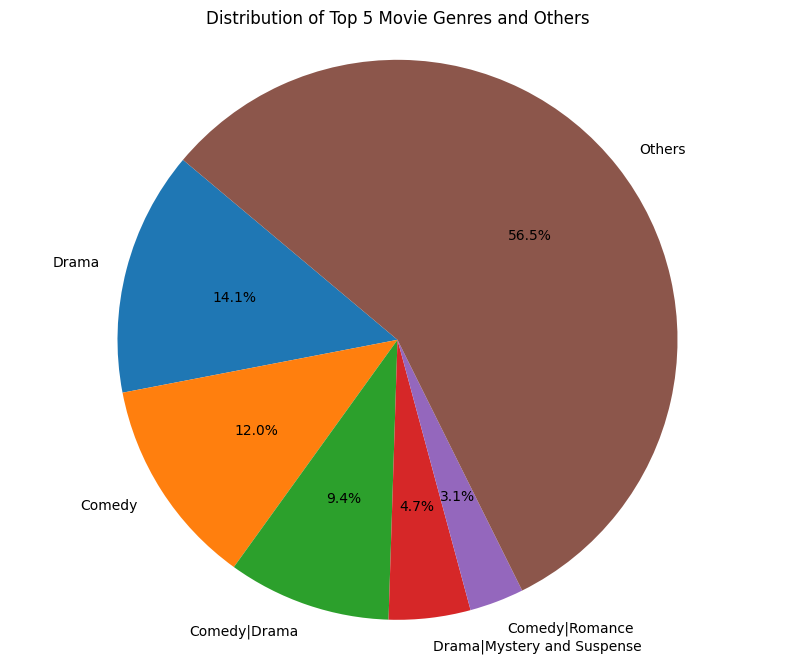

In [160]:
#Pie chart to show the top 5 genres produced for clearer analysis
genre_counts = df1['genre'].value_counts()

# Get the top 5 genres and sum the rest
top_genres = genre_counts.head(5)
other_count = genre_counts[5:].sum()

# Create a new series with the top 5 genres and the 'Others' category
top_genres['Others'] = other_count

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Top 5 Movie Genres and Others')
plt.show()

This is to show that most of the produced movies are the drama and comedy genre.

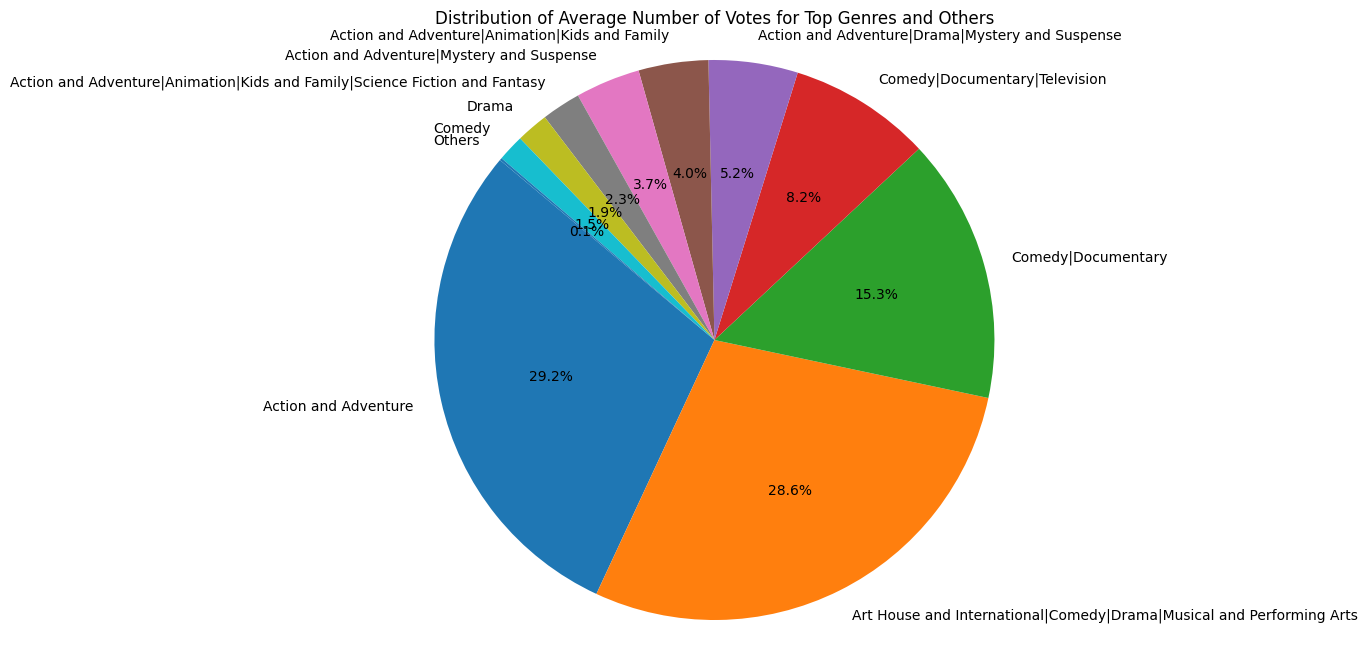

In [161]:
#To check which 10 genre have the most number of votes.
genre_numvotes = df1.groupby('genre')['numvotes'].mean().sort_values(ascending=False)

# Get the top 10 genres and lump the rest
top_10_genres = genre_numvotes.head(10)
other_mean = genre_numvotes[10:].mean()
top_10_genres['Others'] = other_mean

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_10_genres, labels=top_10_genres.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Average Number of Votes for Top Genres and Others')
plt.show()

Despite Drama category having the most releases, the category with the most votes is Action and adventure movies followed by Art House and International genre.

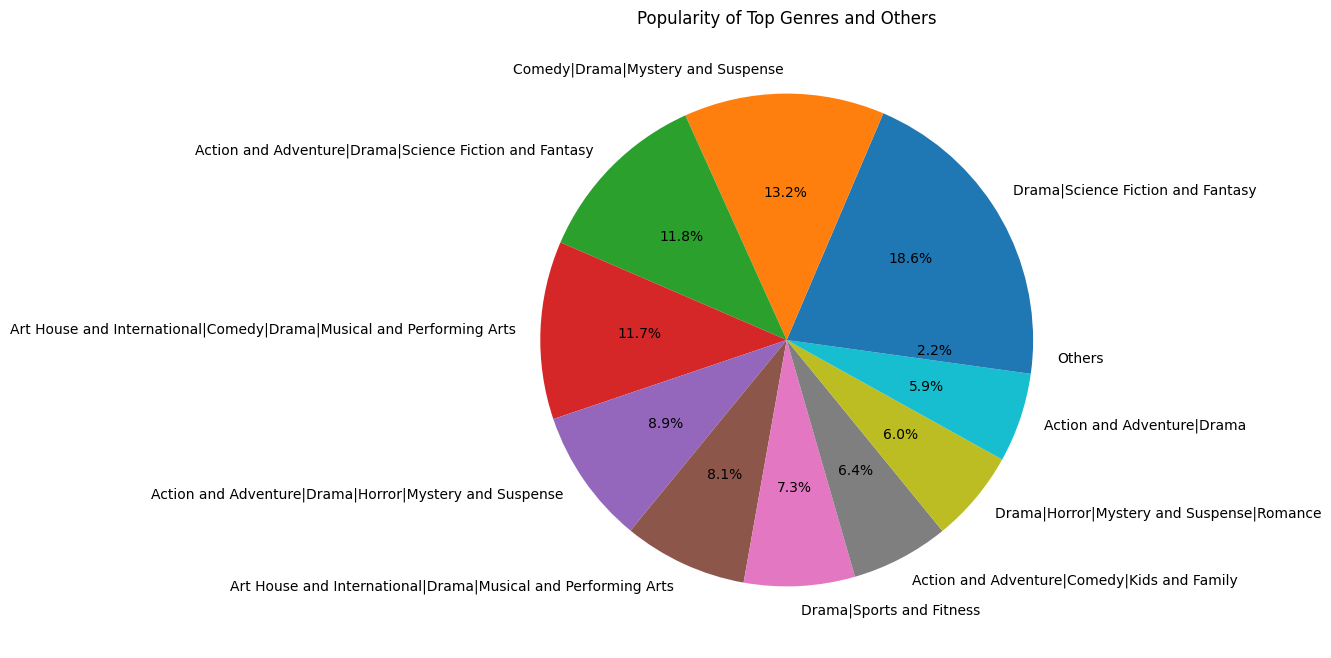

In [162]:
# Calculate the average popularity for each genre
genre_popularity = df1.groupby('genre')['popularity'].mean().sort_values(ascending=False)

# Get the top 10 genres and lump the rest
top_10_genres = genre_popularity.head(10)
other_mean = genre_popularity[10:].mean()
top_10_genres['Others'] = other_mean

# Create a pie chart for the top 10 genres and lump the rest into "Others"
plt.figure(figsize=(8, 8))
plt.pie(top_10_genres, labels=top_10_genres.index, autopct='%1.1f%%')
plt.title('Popularity of Top Genres and Others')
plt.show()

This shows that drama is not only not only the most produced genre but also the most popular genre.

In [163]:
#To check the most performing genre based on ratings.
# Calculate the average rating for each genre
genre_average_rating = df1.groupby('genre')['averagerating'].mean().sort_values(ascending=False)

# Get the top 10 genres and lump the rest
top_10_genres = genre_average_rating.head(10)
other_mean = genre_average_rating[10:].mean()
top_10_genres['Others'] = other_mean

# Calculate the percentage of average rating for each genre
percentage_average_rating = (top_10_genres / top_10_genres.sum()) * 100

# Display the percentage of average rating by genre
print(percentage_average_rating)

genre
Drama|Science Fiction and Fantasy                          10.198449
Action and Adventure|Art House and International           10.198449
Drama|Kids and Family                                       9.396324
Animation|Comedy|Kids and Family                            9.396324
Art House and International|Comedy|Drama|Romance            9.396324
Comedy|Drama|Kids and Family                                9.281734
Action and Adventure|Horror|Science Fiction and Fantasy     8.823377
Action and Adventure|Drama|Horror|Mystery and Suspense      8.823377
Comedy|Mystery and Suspense                                 8.708788
Comedy|Kids and Family                                      8.670591
Others                                                      7.106262
Name: averagerating, dtype: float64


This shows that the best rated genre is Drama which is also the most popular and most produced; followed closely by Action which is also the genre which is voted for most.

In [164]:
#To check for the top 10 genres with the most writers
# Split the writers column into separate rows
writers_df = df1['writer'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).to_frame('writer')
df_split = df1.drop('writer', axis=1).join(writers_df).reset_index(drop=True)

# Calculate the top 10 genres with the most writers
top_10_genres_writers = df_split['genre'].value_counts().head(10)

# Display the 10 genres with the most writers
print(top_10_genres_writers)

Drama                                               27
Comedy                                              23
Comedy|Drama                                        18
Drama|Mystery and Suspense                           9
Comedy|Romance                                       6
Action and Adventure|Science Fiction and Fantasy     5
Comedy|Drama|Romance                                 5
Drama|Romance                                        5
Art House and International|Drama                    5
Horror                                               4
Name: genre, dtype: int64


From the above, we can see that the genres most writers contribute to are;

1.   Drama
2.   Comedy

Action falls on number 6 despite it having the most votes.

In [165]:
#Top 10 writers from df1 and the genres they write on.
# Split the writers column into separate rows
writers_df = df1['writer'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).to_frame('writer')
df_split = df1.drop('writer', axis=1).join(writers_df).reset_index(drop=True)

# Calculate the top 10 writers and the genres they write on
top_10_writers = df_split['writer'].value_counts().head(10)
top_10_writers_genres = df_split[df_split['writer'].isin(top_10_writers.index)][['writer', 'genre']].drop_duplicates()

# Display the top 10 writers and the genres they write on
print(top_10_writers_genres)

                                         writer  \
0                  David Cronenberg|Don DeLillo   
32   Seth MacFarlane|Alec Sulkin|Wellesley Wild   
42                                 Peter Morgan   
67                                 Peter Morgan   
80   Seth MacFarlane|Alec Sulkin|Wellesley Wild   
124                    Mark Schwahn|John Gatins   
125                               David Benioff   
126                                Erik Gandini   
127                              Daniel Taplitz   
128                  Lawrence Kasdan|Meg Kasdan   
129                           Jacob Aaron Estes   
132                          Trey Edward Shults   

                                                 genre  
0                    Drama|Science Fiction and Fantasy  
32                                      Comedy|Western  
42                          Drama|Mystery and Suspense  
67                                       Drama|Romance  
80                                              Com

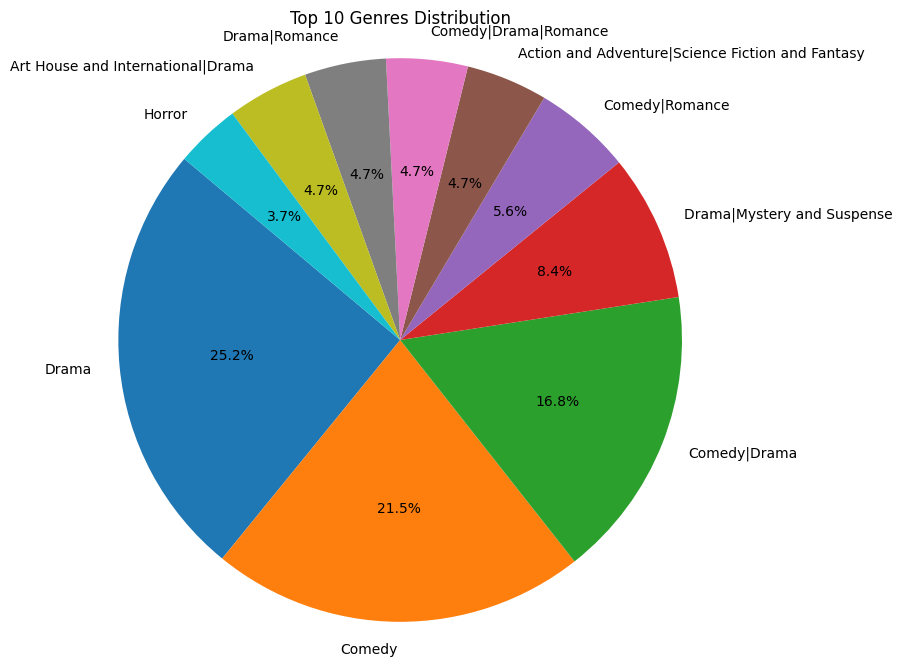

In [166]:
#To plot the top 10 genres
# Calculate the top 10 genres
top_10_genres = df1['genre'].value_counts().head(10)

# Create a pie chart for the top 10 genres
plt.figure(figsize=(8, 8))
plt.pie(top_10_genres, labels=top_10_genres.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 10 Genres Distribution')
plt.show()

The most common genre is Drama followed by comedy.

In [167]:
#To check writers for the top 10 rated movies.
# Filter the DataFrame to get the top 10 rated movies
top_10_rated_movies = df1.nlargest(10, 'averagerating')

# Extract the titles of the top 10 rated movies
top_10_movie_titles = top_10_rated_movies['title']

# Show the top 10 rated movies with their writers
for index, row in top_10_rated_movies.iterrows():
    print(f"Title: {row['title']}, Writer(s): {row['writer']}")

Title: Prometheus, Writer(s): Roman Coppola
Title: J. Edgar, Writer(s): Tamara Jenkins
Title: Mental, Writer(s): Shonda Rhimes
Title: Leap Year (2011), Writer(s): Bill Haney
Title: Alice in Wonderland (2010), Writer(s): David Cronenberg|Don DeLillo
Title: Pompeii, Writer(s): Ciro Guerra|Jacques Toulemonde Vidal
Title: Grown Ups 2, Writer(s): Rodney Carrington|Toby Keith
Title: Epic, Writer(s): Domonic Paris|Dominic Paris
Title: Bride Flight, Writer(s): Seth MacFarlane|Alec Sulkin|Wellesley Wild
Title: Populaire, Writer(s): David Pliler


In [168]:
#To check our top two writers who can be engaged for the most performing genres
# Group by genre and calculate the total worldwide gross for each genre
genre_worldwide_gross = df1.groupby('genre')['worldwide_gross'].sum().sort_values(ascending=False)

# Select top performing genres (e.g., top 5)
top_performing_genres = genre_worldwide_gross.head(5)

# Iterate over top performing genres
for genre in top_performing_genres.index:
    # Filter movies by genre
    genre_movies = df1[df1['genre'] == genre]

    # Get the top 2 writers for the genre based on some metric (e.g., average rating)
    top_writers = genre_movies.groupby('writer')['averagerating'].mean().nlargest(2)

    # Print the genre and its top 2 writers
    print(f"\nTop 2 Writers for Genre '{genre}':")
    for writer, rating in top_writers.items():
        print(f"Writer: {writer}, Average Rating: {rating}")


Top 2 Writers for Genre 'Drama':
Writer: Bill Haney, Average Rating: 9.0
Writer: David Pliler, Average Rating: 8.3

Top 2 Writers for Genre 'Art House and International|Comedy|Drama|Musical and Performing Arts':
Writer: Jim Jarmusch, Average Rating: 7.4

Top 2 Writers for Genre 'Comedy|Drama|Mystery and Suspense':
Writer: Norman Snider, Average Rating: 5.8

Top 2 Writers for Genre 'Drama|Kids and Family':
Writer: Candace Lee|Eric Newman, Average Rating: 8.2

Top 2 Writers for Genre 'Action and Adventure|Drama|Horror|Mystery and Suspense':
Writer: James Wong|Glen Morgan, Average Rating: 7.7


This shows that the best two writers with the highest ratings are Bill Haney and David Piller for the drama category and Jim Jarmusch for Art House. Action the most voted category is led by James Wong and Glen Morgan

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


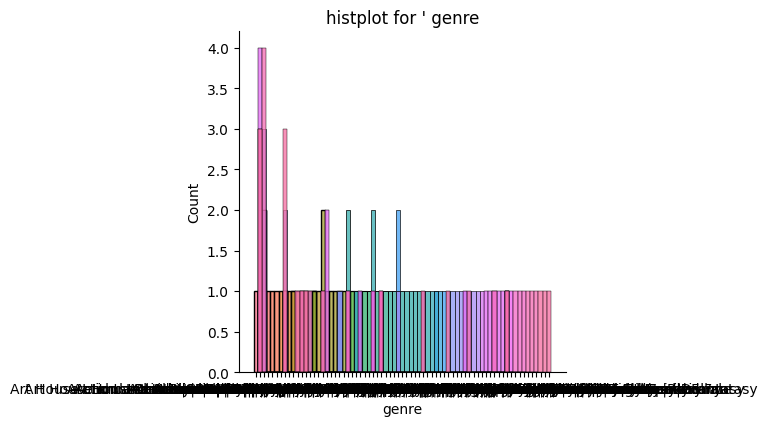

In [169]:
#Analysing monetary values
#To check relationship between genre and production budget
sns.FacetGrid(df1, hue="production_budget", height = 4).map(sns.histplot, "genre")
plt.title("histplot for ' genre")
plt.show()

The above is very hard to read. Below are finer analysis to get more meaningful insights.

In [170]:
# Checking numerical values in df1
numerical_columns = []
for column in df1.columns:
    if pd.api.types.is_numeric_dtype(df1[column]):
        numerical_columns.append(column)

print("Numerical Columns in df1:")
print(numerical_columns)

Numerical Columns in df1:
['domestic_gross', 'year', 'averagerating', 'numvotes', 'Unnamed: 0', 'id', 'popularity', 'vote_average', 'vote_count']


From the above, we shall need to convert production_budget and worldwide_gross to numerical form.

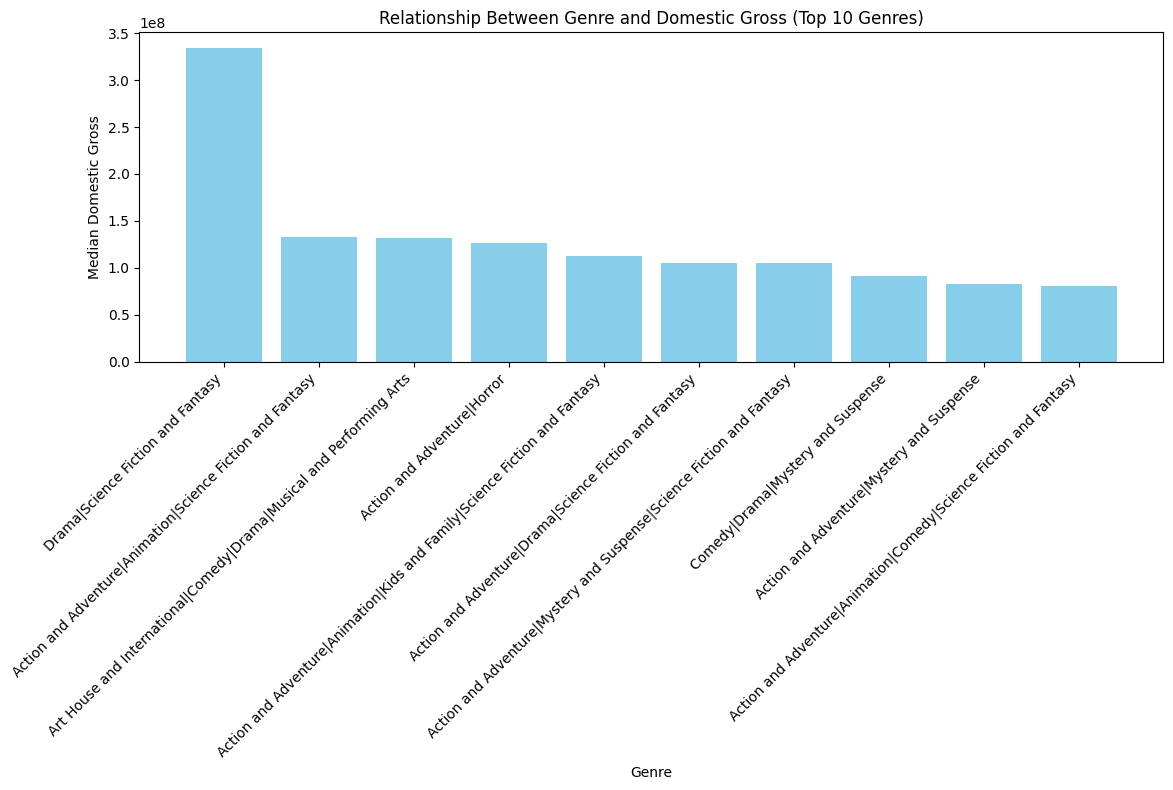

In [172]:
#To check the relationship between genre and domestic gross
# Group by genre and calculate the median domestic gross for each genre
genre_domestic_gross = df1.groupby('genre')['domestic_gross'].median().sort_values(ascending=False)

# Select top 10 genres
top_10_genres = genre_domestic_gross.head(10)

# Plotting the relationship between genre and domestic gross using a bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_10_genres.index, top_10_genres.values, color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Median Domestic Gross')
plt.title('Relationship Between Genre and Domestic Gross (Top 10 Genres)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Domestically Drama(sci-fi) genre generates the most revenue followed by action(sci-fi) then art house.

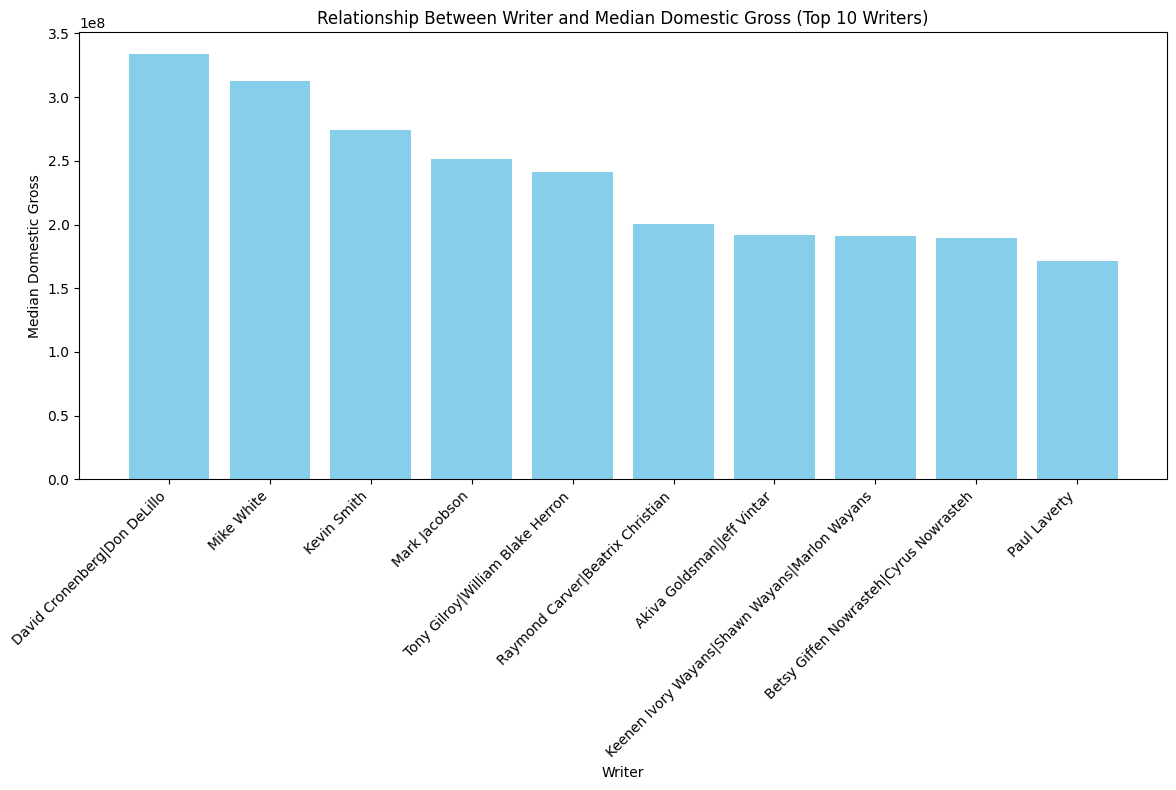

In [173]:
#Checking the relationship between domestic gross and writers
# Group by writer and calculate the median domestic gross for each writer
writer_domestic_gross = df1.groupby('writer')['domestic_gross'].median().sort_values(ascending=False)

# Select top 10 writers based on median domestic gross
top_10_writers = writer_domestic_gross.head(10)

# Plotting the relationship between writer and median domestic gross using a bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_10_writers.index, top_10_writers.values, color='skyblue')
plt.xlabel('Writer')
plt.ylabel('Median Domestic Gross')
plt.title('Relationship Between Writer and Median Domestic Gross (Top 10 Writers)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Locally David C and Don DeLillo's movies are generating the most revenues.

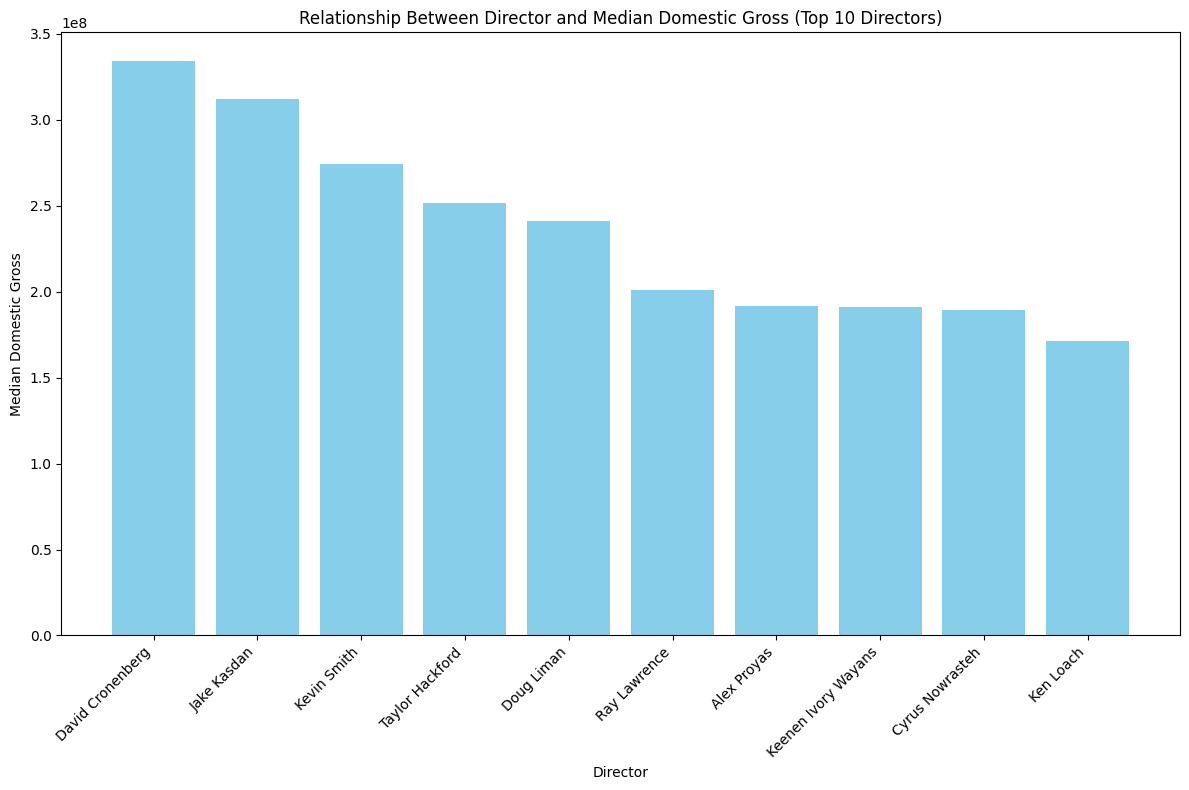

In [174]:
#To check the relationship between domestic gross and directors
# Group by director and calculate the median domestic gross for each director
director_domestic_gross = df1.groupby('director')['domestic_gross'].median().sort_values(ascending=False)

# Select top 10 directors based on median domestic gross
top_10_directors = director_domestic_gross.head(10)

# Plotting the relationship between director and median domestic gross using a bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_10_directors.index, top_10_directors.values, color='skyblue')
plt.xlabel('Director')
plt.ylabel('Median Domestic Gross')
plt.title('Relationship Between Director and Median Domestic Gross (Top 10 Directors)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

It is intersting to note that David Clonenberg is both the top writer and director whose movies generate the most domestic revenue

In [175]:
#To check the writers and directors for the to 10 genres generating the highest domestic gross
# Group by genre and calculate the total domestic gross for each genre
genre_domestic_gross = df1.groupby('genre')['domestic_gross'].sum().sort_values(ascending=False)

# Select top 10 genres based on domestic gross
top_10_genres = genre_domestic_gross.head(10)

# Analyze writers and directors for the top 10 genres
for genre in top_10_genres.index:
    # Filter movies by genre
    genre_movies = df1[df1['genre'] == genre]

    # Get top 2 writers for the genre
    top_writers = genre_movies.groupby('writer')['domestic_gross'].sum().nlargest(2)

    # Get top 2 directors for the genre
    top_directors = genre_movies.groupby('director')['domestic_gross'].sum().nlargest(2)

    # Print genre, top writers, and top directors
    print(f"\nGenre: {genre}")
    print("Top Writers:")
    print(top_writers)
    print("Top Directors:")
    print(top_directors)


Genre: Comedy
Top Writers:
writer
Mike White     312400000.0
Kevin Smith    274100000.0
Name: domestic_gross, dtype: float64
Top Directors:
director
Jake Kasdan    312400000.0
Kevin Smith    274100000.0
Name: domestic_gross, dtype: float64

Genre: Drama
Top Writers:
writer
Mark Jacobson                       251500000.0
Raymond Carver|Beatrix Christian    200800000.0
Name: domestic_gross, dtype: float64
Top Directors:
director
Taylor Hackford    251500000.0
Ray Lawrence       200800000.0
Name: domestic_gross, dtype: float64

Genre: Comedy|Drama
Top Writers:
writer
Roman Coppola    126500000.0
John Gatins       83600000.0
Name: domestic_gross, dtype: float64
Top Directors:
director
Roman Coppola    126500000.0
Brian Robbins     83600000.0
Name: domestic_gross, dtype: float64

Genre: Drama|Science Fiction and Fantasy
Top Writers:
writer
David Cronenberg|Don DeLillo    334200000.0
Name: domestic_gross, dtype: float64
Top Directors:
director
David Cronenberg    334200000.0
Name: domestic_

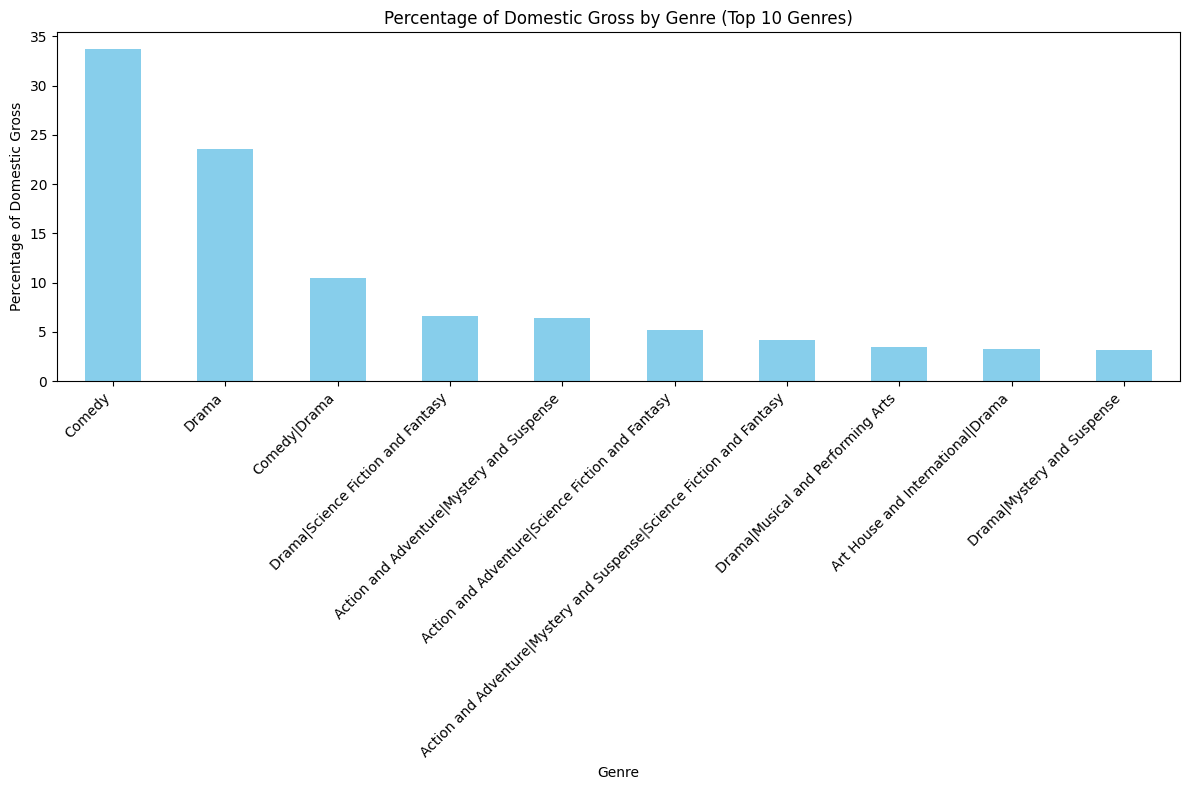

In [178]:
#A plot for easier understanding
# Group by genre and calculate the total domestic gross for each genre
genre_domestic_gross = df1.groupby('genre')['domestic_gross'].sum().sort_values(ascending=False)

# Select top 10 genres based on domestic gross
top_10_genres = genre_domestic_gross.head(10)

# Calculate the percentage of domestic gross for each genre
total_domestic_gross = top_10_genres.sum()
genre_domestic_gross_percentage = (top_10_genres / total_domestic_gross) * 100

# Plotting the domestic gross percentages for the top 10 genres
plt.figure(figsize=(12, 8))
genre_domestic_gross_percentage.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Percentage of Domestic Gross')
plt.title('Percentage of Domestic Gross by Genre (Top 10 Genres)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

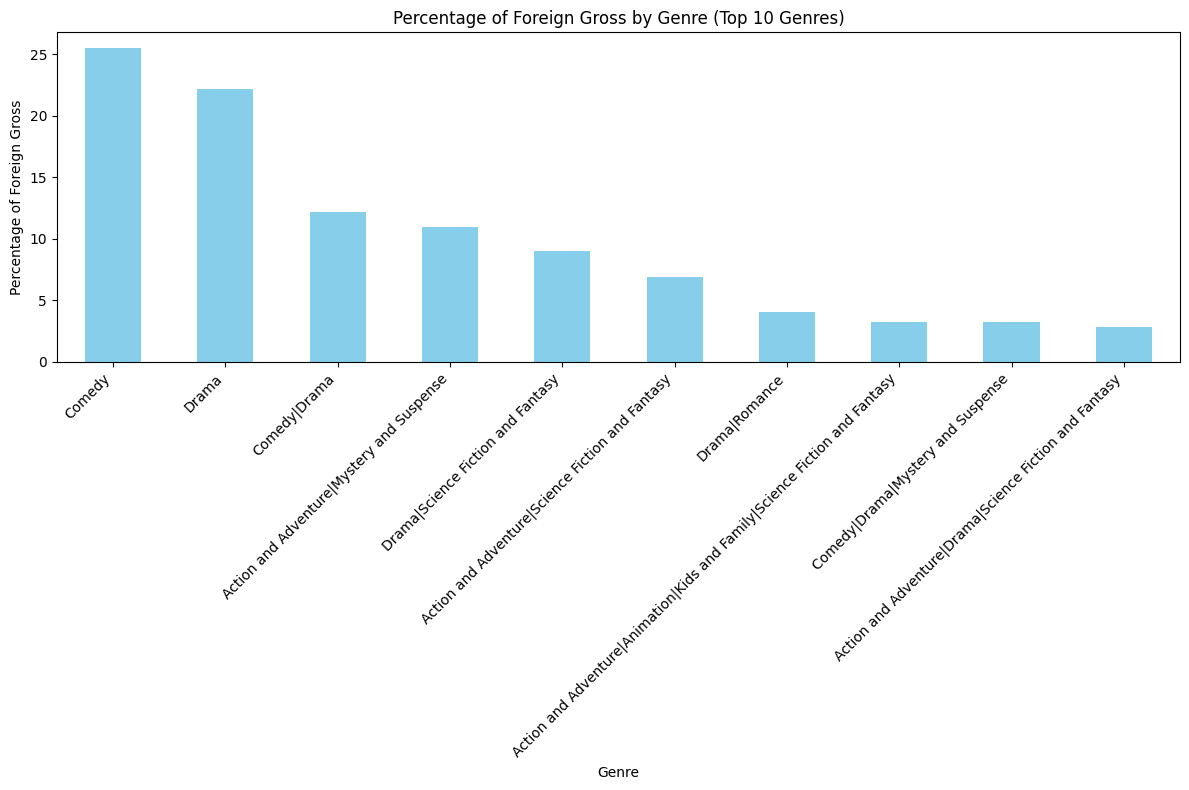

In [180]:
#Checking the most performing genres internationally
#Changing foreign gross tonnumeric form
df1['foreign_gross'] = pd.to_numeric(df1['foreign_gross'], errors='coerce')

# Group by genre and calculate the total foreign gross for each genre
genre_foreign_gross = df1.groupby('genre')['foreign_gross'].sum().sort_values(ascending=False)

# Select top 10 genres based on foreign gross
top_10_genres = genre_foreign_gross.head(10)

# Calculate the percentage of foreign gross for each genre
total_foreign_gross = top_10_genres.sum()
genre_foreign_gross_percentage = (top_10_genres / total_foreign_gross) * 100

# Plotting the foreign gross percentages for the top 10 genres
plt.figure(figsize=(12, 8))
genre_foreign_gross_percentage.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Percentage of Foreign Gross')
plt.title('Percentage of Foreign Gross by Genre (Top 10 Genres)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Interesting, looks like comedy dominates both the domestic and international market in foreign currency

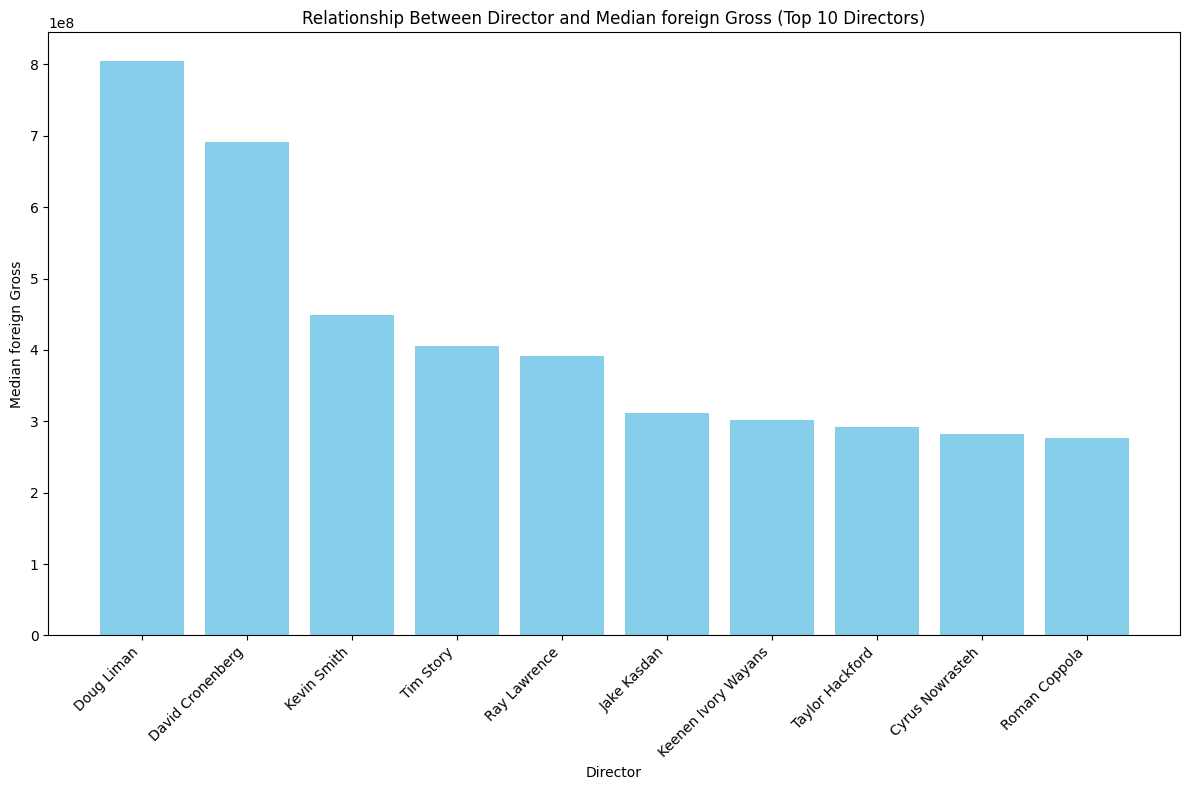

In [182]:
#To check the relationship between foreign gross and directors
# Group by director and calculate the median foreign gross for each director
director_foreign_gross = df1.groupby('director')['foreign_gross'].median().sort_values(ascending=False)

# Select top 10 directors based on median worldwide gross
top_10_directors = director_foreign_gross.head(10)

# Plotting the relationship between director and median foreign gross using a bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_10_directors.index, top_10_directors.values, color='skyblue')
plt.xlabel('Director')
plt.ylabel('Median foreign Gross')
plt.title('Relationship Between Director and Median foreign Gross (Top 10 Directors)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This shows that Locally our David C is well dominant but has been bypassed by Doug Liman internationally who was position 5 locally.

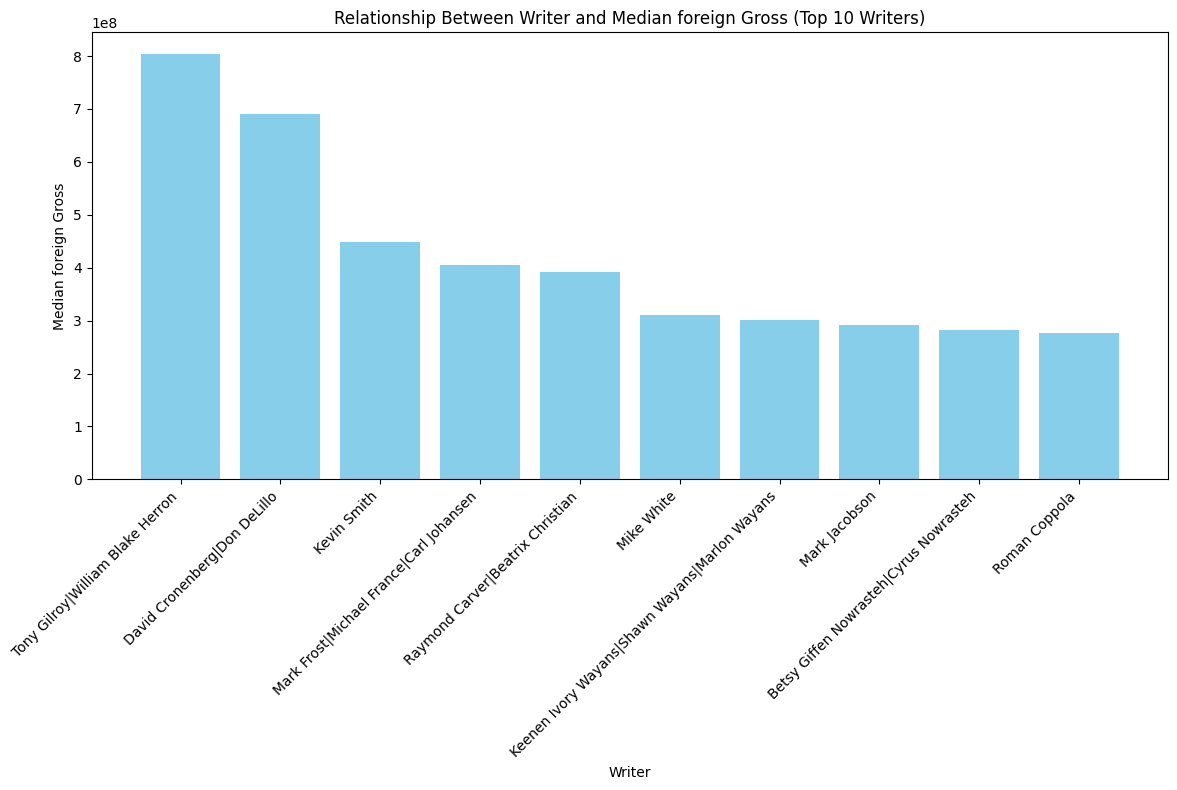

In [183]:
#Checking the relationship between foreign gross and writers
# Group by writer and calculate the median foreign gross for each writer
writer_foreign_gross = df1.groupby('writer')['foreign_gross'].median().sort_values(ascending=False)

# Select top 10 writers based on median foreign gross
top_10_writers = writer_foreign_gross.head(10)

# Plotting the relationship between writer and median foreign gross using a bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_10_writers.index, top_10_writers.values, color='skyblue')
plt.xlabel('Writer')
plt.ylabel('Median foreign Gross')
plt.title('Relationship Between Writer and Median foreign Gross (Top 10 Writers)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [184]:
#To check the top 5 writers dominant in generating both domestic and foreign gross
# Group by writer and calculate the total domestic and foreign gross for each writer
writer_domestic_gross = df1.groupby('writer')['domestic_gross'].sum().sort_values(ascending=False)
writer_foreign_gross = df1.groupby('writer')['foreign_gross'].sum().sort_values(ascending=False)

# Identify the top 5 writers dominant in both domestic and foreign gross
top_5_writers = writer_domestic_gross.head(5).index.intersection(writer_foreign_gross.head(5).index)

print("Top 5 Writers Dominant in Both Domestic and Foreign Gross:")
for writer in top_5_writers:
    print(writer)

Top 5 Writers Dominant in Both Domestic and Foreign Gross:
David Cronenberg|Don DeLillo
Kevin Smith
Tony Gilroy|William Blake Herron


In [186]:
#To check the top 5 directors dominant in generating both domestic and foreign gross
# Group by director and calculate the total domestic and foreign gross for each director
director_domestic_gross = df1.groupby('director')['domestic_gross'].sum().sort_values(ascending=False)
director_foreign_gross = df1.groupby('director')['foreign_gross'].sum().sort_values(ascending=False)

# Identify the top 5 director dominant in both domestic and foreign gross
top_5_directors = director_domestic_gross.head(5).index.intersection(director_foreign_gross.head(5).index)

print("Top 5 directors Dominant in Both Domestic and Foreign Gross:")
for director in top_5_directors:
    print(director)

Top 5 directors Dominant in Both Domestic and Foreign Gross:
David Cronenberg
Kevin Smith
Doug Liman


Generally the films generating the most revenue and written and directed by David Cronenberg followed by Kevin Smith.

In [187]:
#To check the top 5 movies, the writers and directors to confirm if our world top ones are involved.
# Select the top 5 rated movies
top_5_rated_movies = df1.nlargest(5, 'averagerating')

# Create a DataFrame with the required columns
top_5_data = {
    'Title': top_5_rated_movies['title'],
    'Genre': top_5_rated_movies['genre'],
    'Director': top_5_rated_movies['director'],
    'Writer': top_5_rated_movies['writer']
}

top_5_df = pd.DataFrame(top_5_data)

# Print the DataFrame
print(top_5_df)

                           Title                              Genre  \
744                   Prometheus                       Comedy|Drama   
406                     J. Edgar                       Comedy|Drama   
1323                      Mental             Comedy|Kids and Family   
660             Leap Year (2011)                              Drama   
1     Alice in Wonderland (2010)  Drama|Science Fiction and Fantasy   

              Director                        Writer  
744      Roman Coppola                 Roman Coppola  
406     Tamara Jenkins                Tamara Jenkins  
1323    Garry Marshall                 Shonda Rhimes  
660         Tim Disney                    Bill Haney  
1     David Cronenberg  David Cronenberg|Don DeLillo  


Only David Cronenberg is in the list

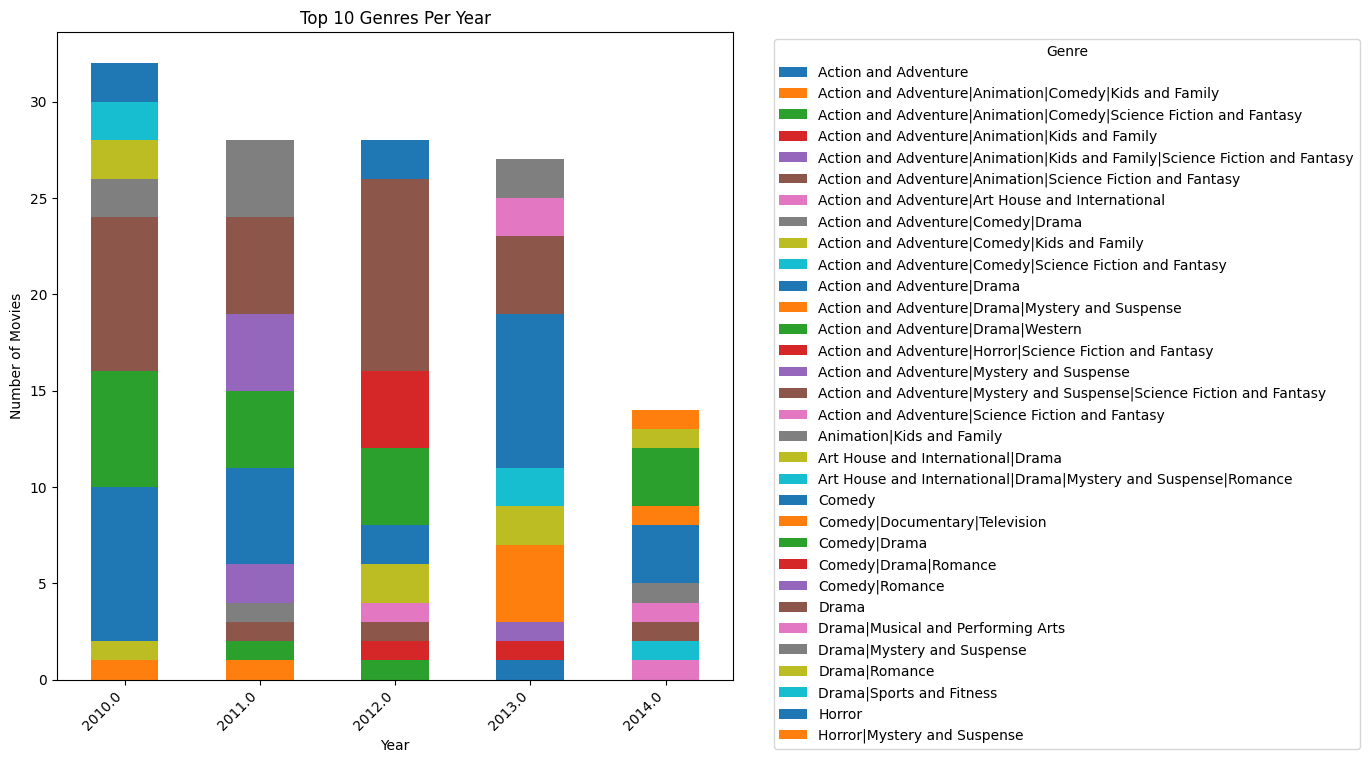

In [188]:
#To check top 10 genres per year
# Group the data by year and genre, count the occurrences of each genre per year
genre_counts_per_year = df1.groupby(['year', 'genre']).size().reset_index(name='count')

# Sort the genre counts within each year
genre_counts_per_year_sorted = genre_counts_per_year.sort_values(by=['year', 'count'], ascending=[True, False])

# Get the top 10 genres per year
top_10_genres_per_year = genre_counts_per_year_sorted.groupby('year').head(10)

# Pivot the data for easy plotting
pivot_table = top_10_genres_per_year.pivot(index='year', columns='genre', values='count').fillna(0)

# Plotting
pivot_table.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Top 10 Genres Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

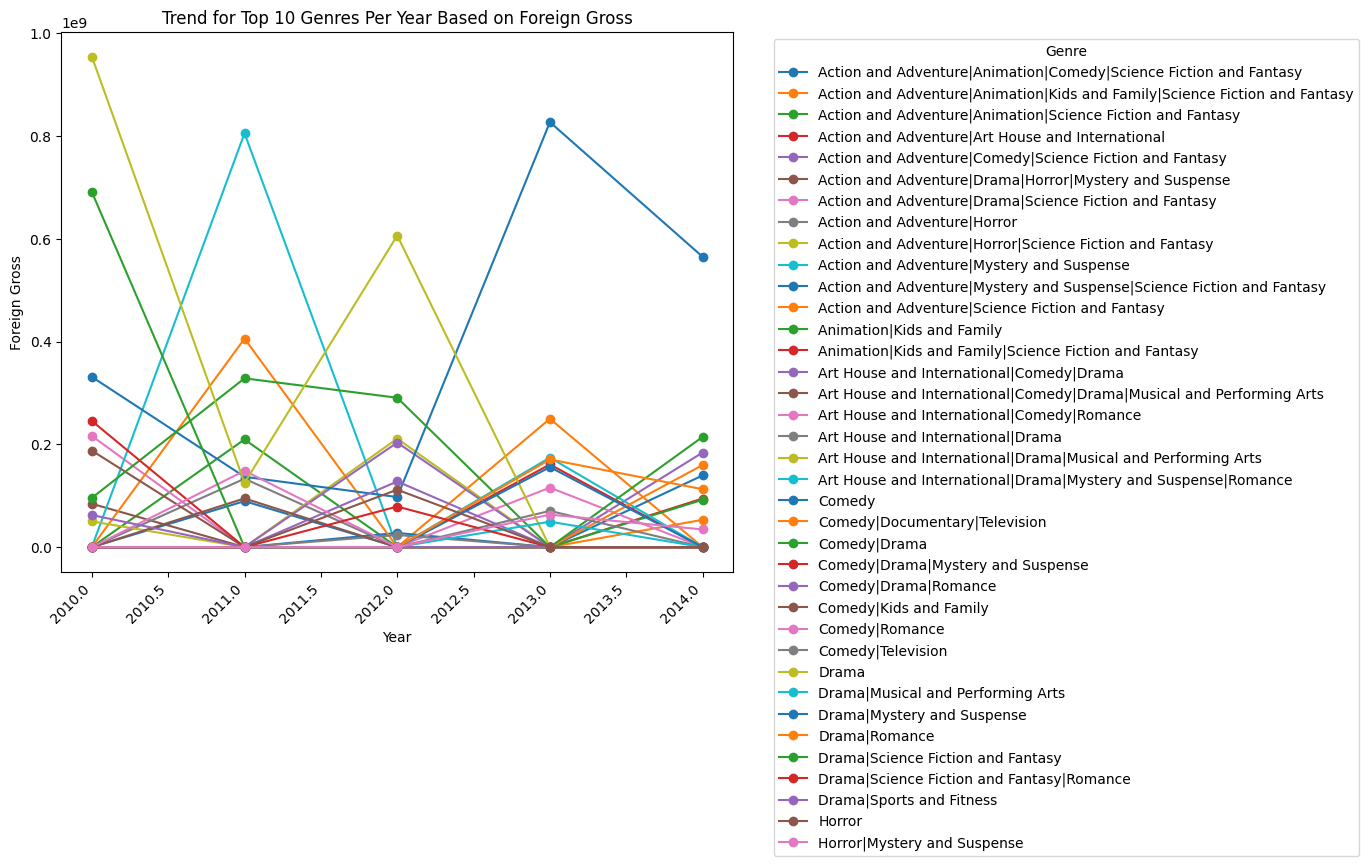

In [189]:
#To analyse the trend per year based on the foreign gross for our top 10 genres
# Group the data by year, genre, and sum the foreign gross for each genre per year
genre_foreign_gross_per_year = df1.groupby(['year', 'genre'])['foreign_gross'].sum().reset_index()

# Sort the foreign gross within each year
genre_foreign_gross_per_year_sorted = genre_foreign_gross_per_year.sort_values(by=['year', 'foreign_gross'], ascending=[True, False])

# Get the top 10 genres per year
top_10_genres_per_year_foreign_gross = genre_foreign_gross_per_year_sorted.groupby('year').head(10)

# Pivot the data for easy plotting
pivot_table_foreign_gross = top_10_genres_per_year_foreign_gross.pivot(index='year', columns='genre', values='foreign_gross').fillna(0)

# Plotting
pivot_table_foreign_gross.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Trend for Top 10 Genres Per Year Based on Foreign Gross')
plt.xlabel('Year')
plt.ylabel('Foreign Gross')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

For the last two years, we can see some genres with an upward trend and some with a downward trend but none is in between.

In [192]:
#To check the genres with the most upward trend and those with highest downward trend for the last two years.
# Group the data by year, genre, and sum the foreign gross for each genre per year
genre_foreign_gross_per_year = df1.groupby(['year', 'genre'])['foreign_gross'].sum().reset_index()

# Filter data for the last two years
last_two_years_data = genre_foreign_gross_per_year[genre_foreign_gross_per_year['year'] >= genre_foreign_gross_per_year['year'].max() - 1]

# Pivot the data for easy comparison between the two years
pivot_table = last_two_years_data.pivot(index='genre', columns='year', values='foreign_gross').fillna(0)

# Calculate the change in foreign gross between the last two years
pivot_table['change'] = pivot_table.iloc[:, -1] - pivot_table.iloc[:, -2]

# Sort the genres by change in foreign gross
genres_with_upward_trend = pivot_table['change'].nlargest(3)
genres_with_downward_trend = pivot_table['change'].nsmallest(3)

print("Genres with the Most Upward Trend:")
print(genres_with_upward_trend)
print("\nGenres with the Highest Downward Trend:")
print(genres_with_downward_trend)

Genres with the Most Upward Trend:
genre
Comedy|Drama                                               212200000.0
Action and Adventure|Comedy|Science Fiction and Fantasy    184100000.0
Comedy|Documentary|Television                              159700000.0
Name: change, dtype: float64

Genres with the Highest Downward Trend:
genre
Comedy                                                                       -262100000.0
Action and Adventure|Animation|Kids and Family|Science Fiction and Fantasy   -249800000.0
Art House and International|Drama|Mystery and Suspense|Romance               -174200000.0
Name: change, dtype: float64


From this we can see movie tastes and reception changes with time.

In [195]:
#To analyse the foreign and domenstic revenues overtime , year and percentage growth
# Extract the year from the release date
df1['release_year'] = pd.to_datetime(df1['release_date']).dt.year

# Group by year and sum the domestic and foreign gross
revenue_by_year = df1.groupby('release_year')[['domestic_gross', 'foreign_gross']].sum()

# Calculate the year-on-year percentage growth for domestic and foreign gross
revenue_by_year['domestic_growth'] = revenue_by_year['domestic_gross'].pct_change() * 100
revenue_by_year['foreign_growth'] = revenue_by_year['foreign_gross'].pct_change() * 100

# Display the analysis results
print("Revenue Analysis Over Time:")
print(revenue_by_year)

Revenue Analysis Over Time:
              domestic_gross  foreign_gross  domestic_growth  foreign_growth
release_year                                                                
1956            6.190000e+05       38400000              NaN             NaN
2004            1.053000e+08      216400000     16911.308562      463.541667
2007            2.100000e+06       23700000       -98.005698      -89.048059
2009            3.836000e+08      380500000     18166.666619     1505.485232
2010            7.298350e+09    11086267497      1802.593800     2813.605124
2011            1.090000e+07        7200000       -99.850651      -99.935055
2013            2.320000e+07       94600000       112.844037     1213.888889


The movie revenues dropped in 2011 but have increased significantly after that.

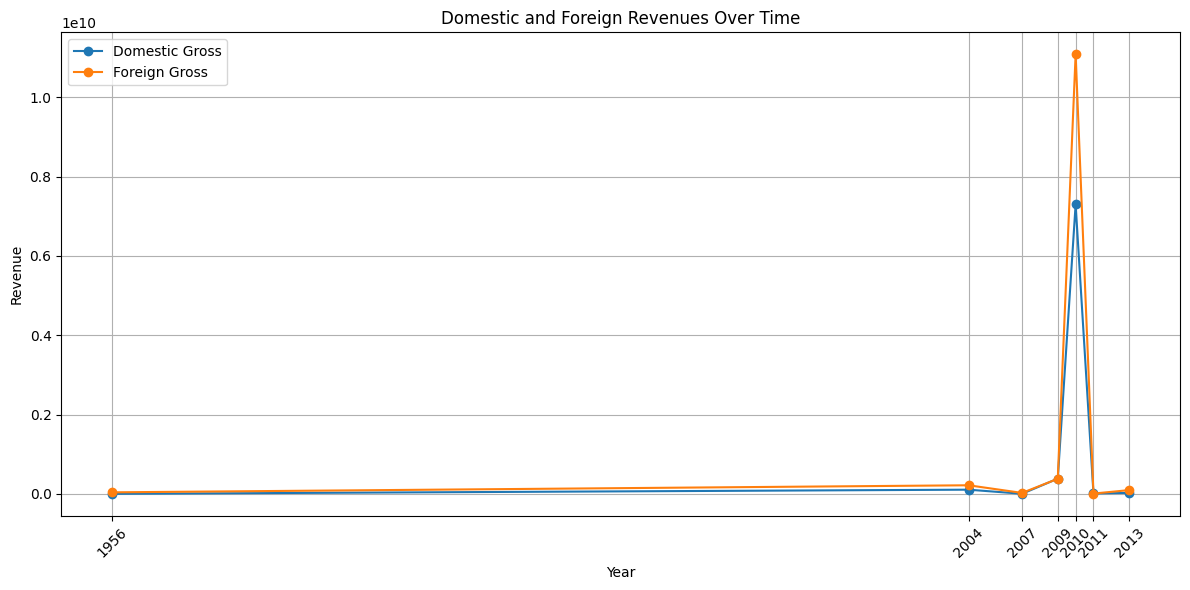

In [196]:
# Plotting the revenue trends over time
plt.figure(figsize=(12, 6))
plt.plot(revenue_by_year.index, revenue_by_year['domestic_gross'], marker='o', label='Domestic Gross')
plt.plot(revenue_by_year.index, revenue_by_year['foreign_gross'], marker='o', label='Foreign Gross')
plt.title('Domestic and Foreign Revenues Over Time')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.xticks(revenue_by_year.index, rotation=45)
plt.tight_layout()
plt.show()

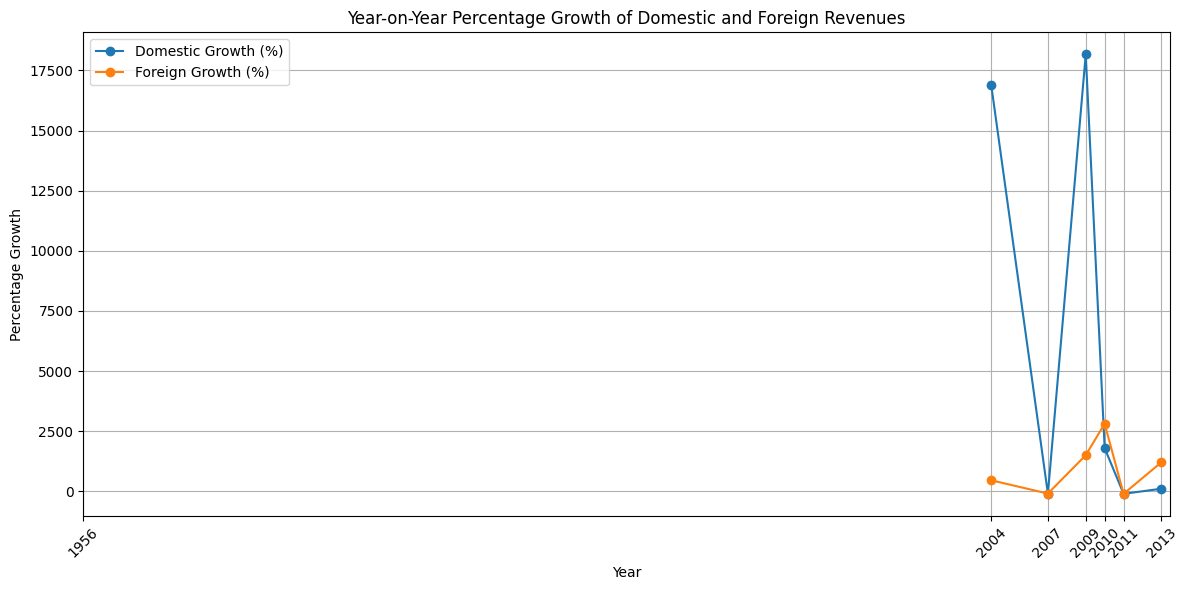

In [197]:
# Plotting the year-on-year percentage growth
plt.figure(figsize=(12, 6))
plt.plot(revenue_by_year.index, revenue_by_year['domestic_growth'], marker='o', label='Domestic Growth (%)')
plt.plot(revenue_by_year.index, revenue_by_year['foreign_growth'], marker='o', label='Foreign Growth (%)')
plt.title('Year-on-Year Percentage Growth of Domestic and Foreign Revenues')
plt.xlabel('Year')
plt.ylabel('Percentage Growth')
plt.legend()
plt.grid(True)
plt.xticks(revenue_by_year.index, rotation=45)
plt.tight_layout()
plt.show()

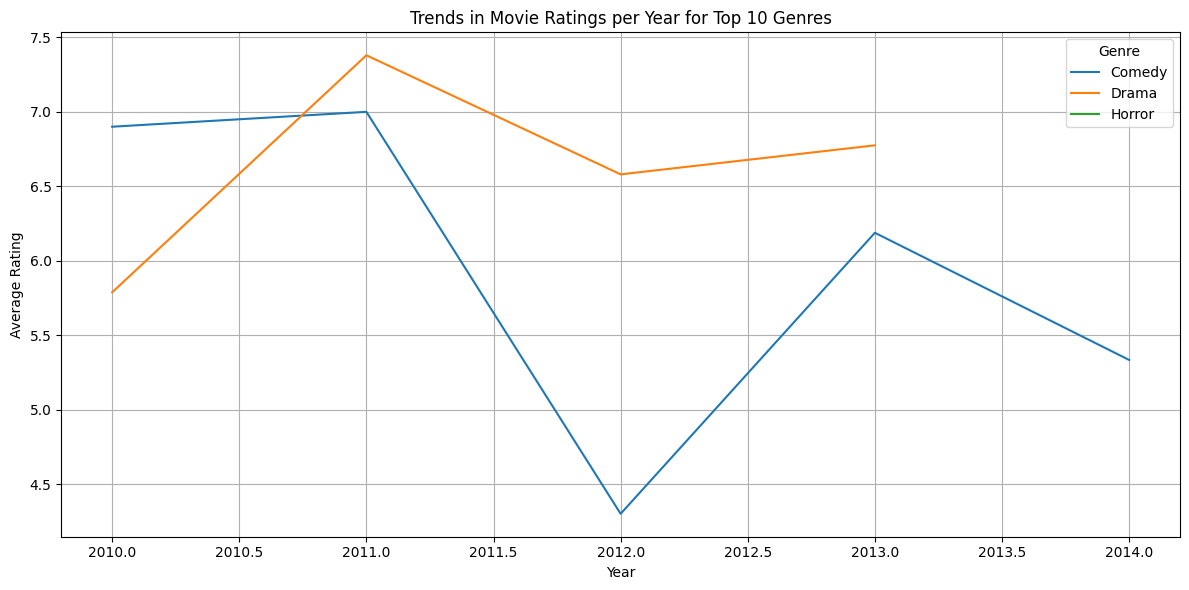

In [198]:
#Analysis of trends in movie ratings per year for top 10 genres, for top 5 directors and for top 5 writers
# Top 10 genres, top 5 directors, and top 5 writers (replace with your actual data)
top_10_genres = ['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance', 'Sci-Fi', 'Thriller', 'Crime', 'Fantasy']
top_5_directors = ['Director1', 'Director2', 'Director3', 'Director4', 'Director5']
top_5_writers = ['Writer1', 'Writer2', 'Writer3', 'Writer4', 'Writer5']

# Filter data for top genres, directors, and writers
filtered_data = df1[df1['genre'].isin(top_10_genres) |
                    df1['director'].isin(top_5_directors) |
                    df1['writer'].isin(top_5_writers)]

# Group data by year and calculate average rating for each genre, director, and writer per year
grouped_data_genre = filtered_data.groupby(['year', 'genre'])['averagerating'].mean().unstack()
grouped_data_director = filtered_data.groupby(['year', 'director'])['averagerating'].mean().unstack()
grouped_data_writer = filtered_data.groupby(['year', 'writer'])['averagerating'].mean().unstack()

# Plotting trends for top 10 genres
plt.figure(figsize=(12, 6))
grouped_data_genre.plot(ax=plt.gca())
plt.title('Trends in Movie Ratings per Year for Top 10 Genres')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(title='Genre')
plt.grid(True)
plt.tight_layout()
plt.show()

Drama category is showing an upward trend whicle Comedy is losing in the trend.

In [201]:
#To identify the trend of the top 5 directors and writers based on ratings to evaluate performance
# Group data by directors and calculate average ratings
director_average_ratings = df1.groupby('director')['averagerating'].mean().sort_values(ascending=False)

# Select top 5 directors based on average ratings
top_5_directors = director_average_ratings.head(5)

# Group data by writers and calculate average ratings
writer_average_ratings = df1.groupby('writer')['averagerating'].mean().sort_values(ascending=False)

# Select top 5 writers based on average ratings
top_5_writers = writer_average_ratings.head(5)

print("Top 5 Directors Based on Average Ratings:")
print(top_5_directors)
print("\nTop 5 Writers Based on Average Ratings:")
print(top_5_writers)

Top 5 Directors Based on Average Ratings:
director
Roman Coppola       9.3
Tamara Jenkins      9.2
Garry Marshall      9.1
Tim Disney          9.0
David Cronenberg    8.9
Name: averagerating, dtype: float64

Top 5 Writers Based on Average Ratings:
writer
Roman Coppola                   9.3
Tamara Jenkins                  9.2
Shonda Rhimes                   9.1
Bill Haney                      9.0
David Cronenberg|Don DeLillo    8.9
Name: averagerating, dtype: float64


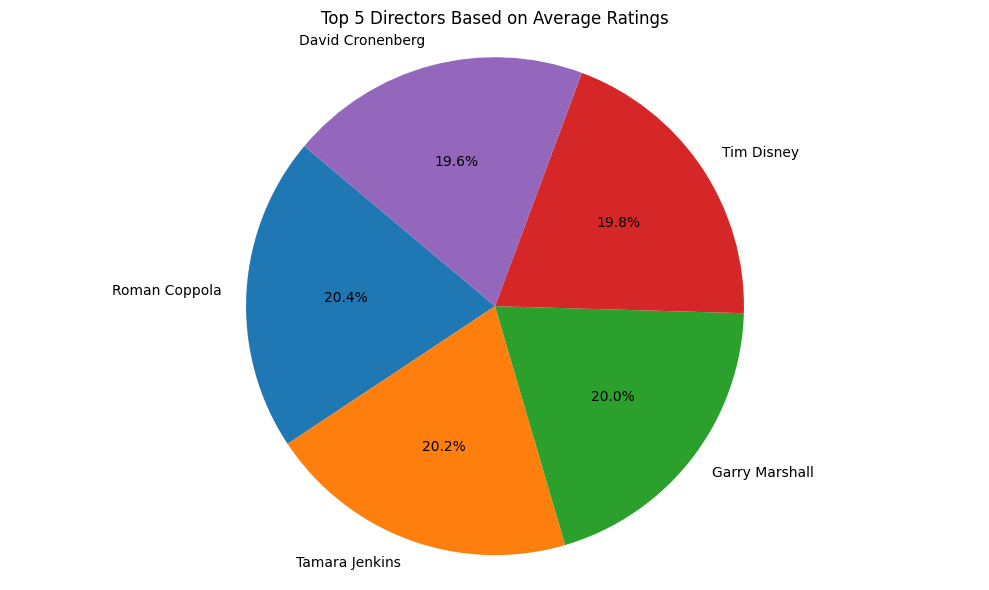

In [203]:
# Plotting top 5 directors based on average ratings
plt.figure(figsize=(10, 6))
plt.pie(top_5_directors, labels=top_5_directors.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Directors Based on Average Ratings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

The above shows that Roman and Tamara are the future of the movies world based on the movie ratings as directors.

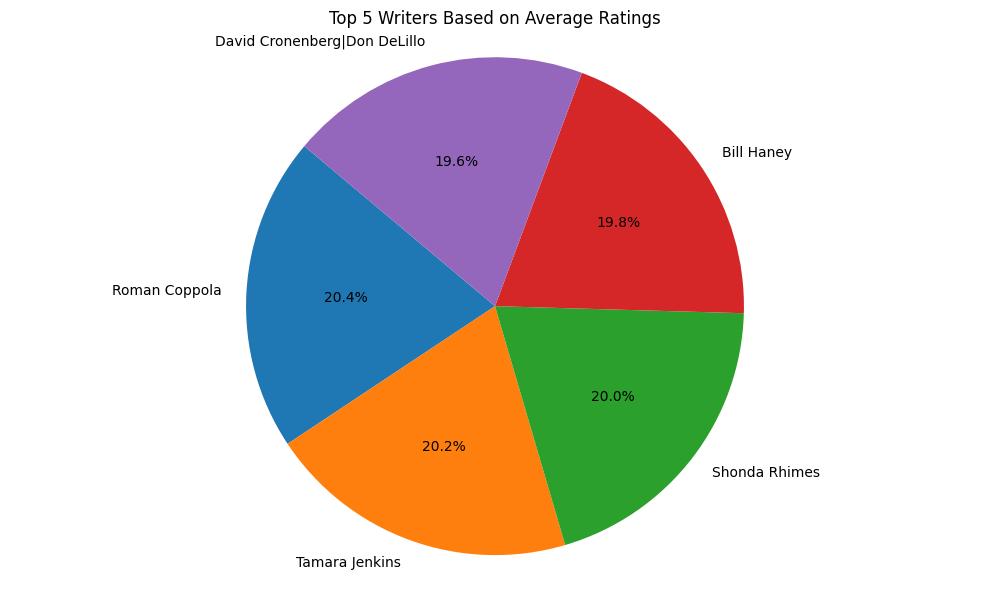

In [204]:
# Plotting top 5 writers based on average ratings
plt.figure(figsize=(10, 6))
plt.pie(top_5_writers, labels=top_5_writers.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Writers Based on Average Ratings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

The above shows that Roman and Tamara are the future of the movies world based on the movie ratings as writers.

In [209]:
#Most popular genre
# Group data by genre and sum the popularity scores
total_popularity_per_genre = df1.groupby('genre')['popularity'].sum()

# Find the genre with the most popularity
most_popular_genre = total_popularity_per_genre.idxmax()
total_popularity_score = total_popularity_per_genre.max()

print(f"The genre with the most popularity is '{most_popular_genre}' with a total popularity score of {total_popularity_score}.")

The genre with the most popularity is 'Drama' with a total popularity score of 156.836.


<ipython-input-210-d37c72ecdafe>:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_genres_and_other = top_5_genres.append(pd.Series(other_genre_popularity, index=['Other']))


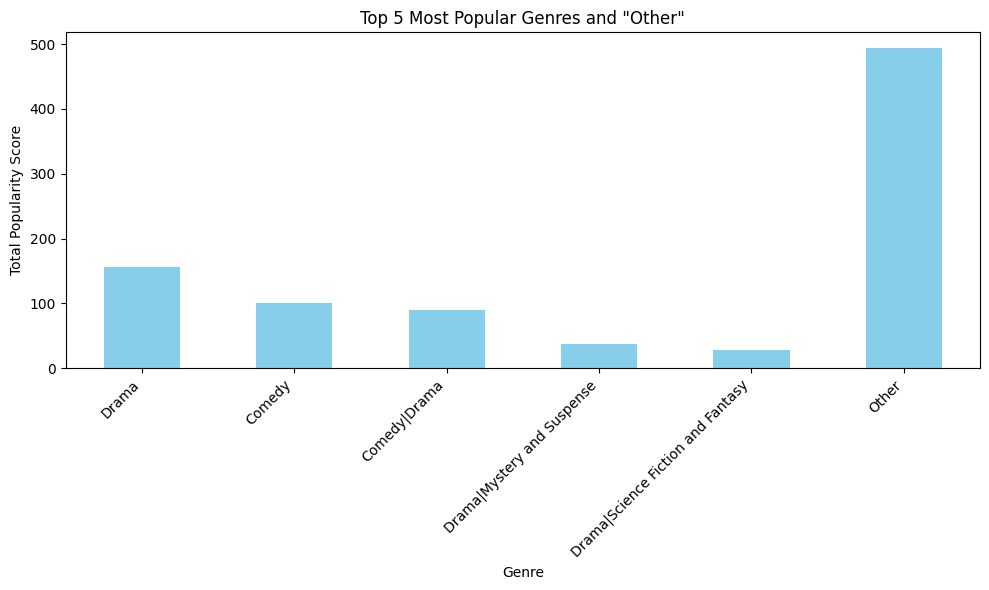

In [210]:
# Plotting the top 5 most popular genres
# Group data by genre and sum the popularity scores
total_popularity_per_genre = df1.groupby('genre')['popularity'].sum()

# Sort the genres by popularity in descending order
sorted_genres = total_popularity_per_genre.sort_values(ascending=False)

# Select the top 5 most popular genres
top_5_genres = sorted_genres.head(5)

# Lump up the rest of the genres into an "Other" category
other_genre_popularity = sorted_genres[5:].sum()

# Create a new Series with the top 5 genres and the lumped "Other" category
top_genres_and_other = top_5_genres.append(pd.Series(other_genre_popularity, index=['Other']))

# Plot a bar chart
plt.figure(figsize=(10, 6))
top_genres_and_other.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Popular Genres and "Other"')
plt.xlabel('Genre')
plt.ylabel('Total Popularity Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-215-09825b0696c6>:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_genres_and_other = top_5_genres.append(pd.Series(other_genre_box_office, index=['Other']))


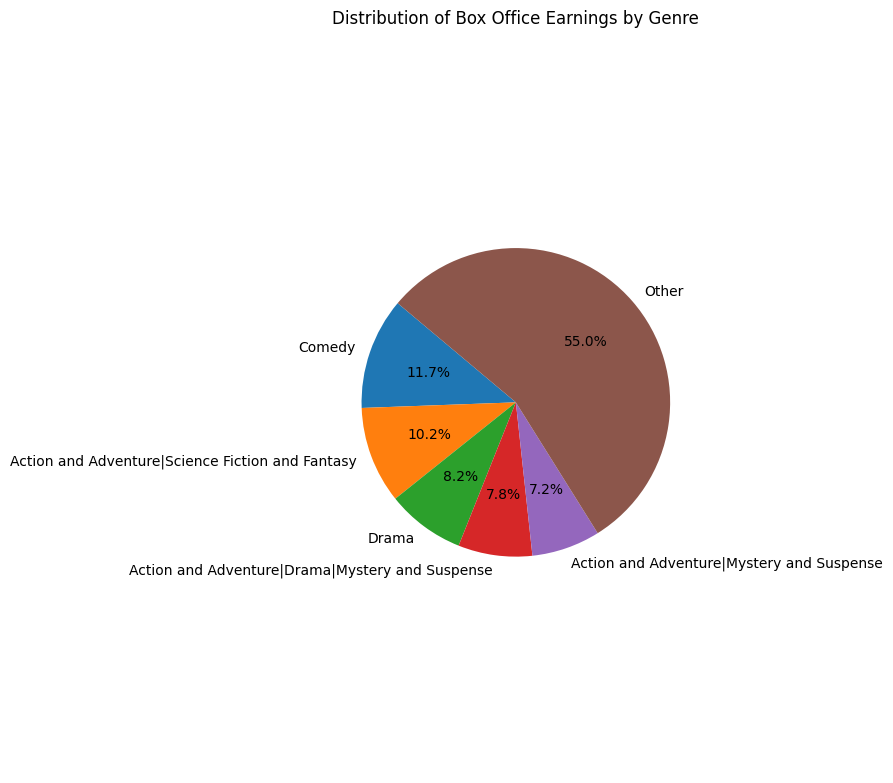

In [215]:
# To plot box office earnings versus genre
# Remove commas from box_office values and convert them to float
df1['box_office'] = df1['box_office'].str.replace(',', '').astype(float)

# Group data by genre and sum the box office earnings
total_box_office_per_genre = df1.groupby('genre')['box_office'].sum()

# Sort the genres by box office earnings in descending order
sorted_genres = total_box_office_per_genre.sort_values(ascending=False)

# Select the top 5 genres with the highest box office earnings
top_5_genres = sorted_genres.head(5)

# Lump up the box office earnings of the remaining genres into an "Other" category
other_genre_box_office = sorted_genres[5:].sum()

# Create a new Series with the top 5 genres and the lumped "Other" category
top_genres_and_other = top_5_genres.append(pd.Series(other_genre_box_office, index=['Other']))

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_genres_and_other, labels=top_genres_and_other.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Box Office Earnings by Genre')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

<ipython-input-216-8cc8317cd40f>:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_writers_and_other = top_5_writers.append(pd.Series(other_writer_box_office, index=['Other']))


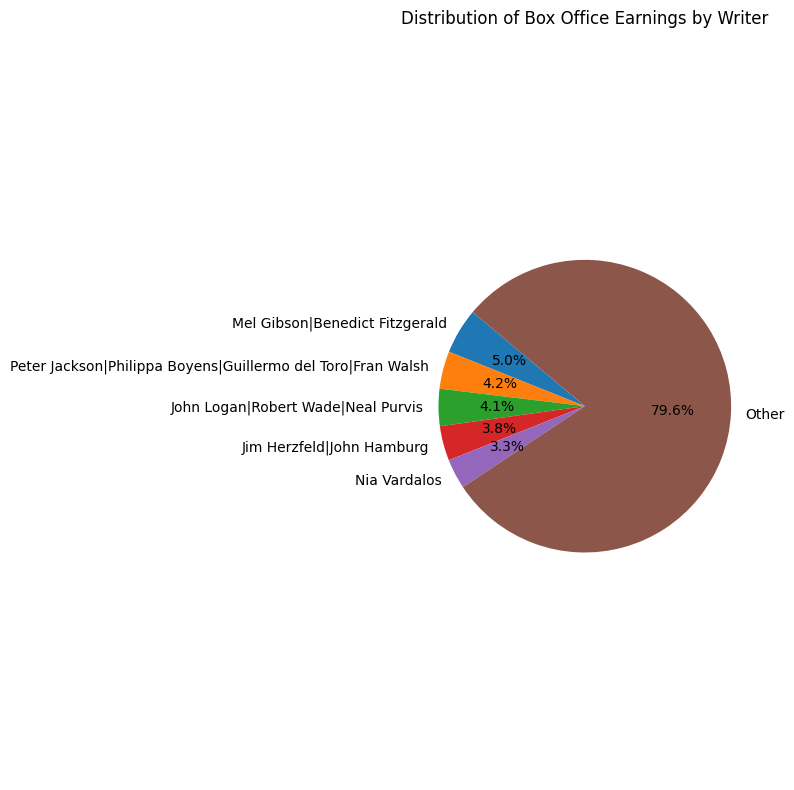

In [216]:
# To plot box office agaisnt writers
# Group data by writer and sum the box office earnings
total_box_office_per_writer = df1.groupby('writer')['box_office'].sum()

# Sort the writers by box office earnings in descending order
sorted_writers = total_box_office_per_writer.sort_values(ascending=False)

# Select the top 5 writers with the highest box office earnings
top_5_writers = sorted_writers.head(5)

# Lump up the box office earnings of the remaining writers into an "Other" category
other_writer_box_office = sorted_writers[5:].sum()

# Create a new Series with the top 5 writers and the lumped "Other" category
top_writers_and_other = top_5_writers.append(pd.Series(other_writer_box_office, index=['Other']))

# Plot a pie chart for writers
plt.figure(figsize=(8, 8))
plt.pie(top_writers_and_other, labels=top_writers_and_other.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Box Office Earnings by Writer')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

<ipython-input-217-89c4ae00f30b>:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_directors_and_other = top_5_directors.append(pd.Series(other_director_box_office, index=['Other']))


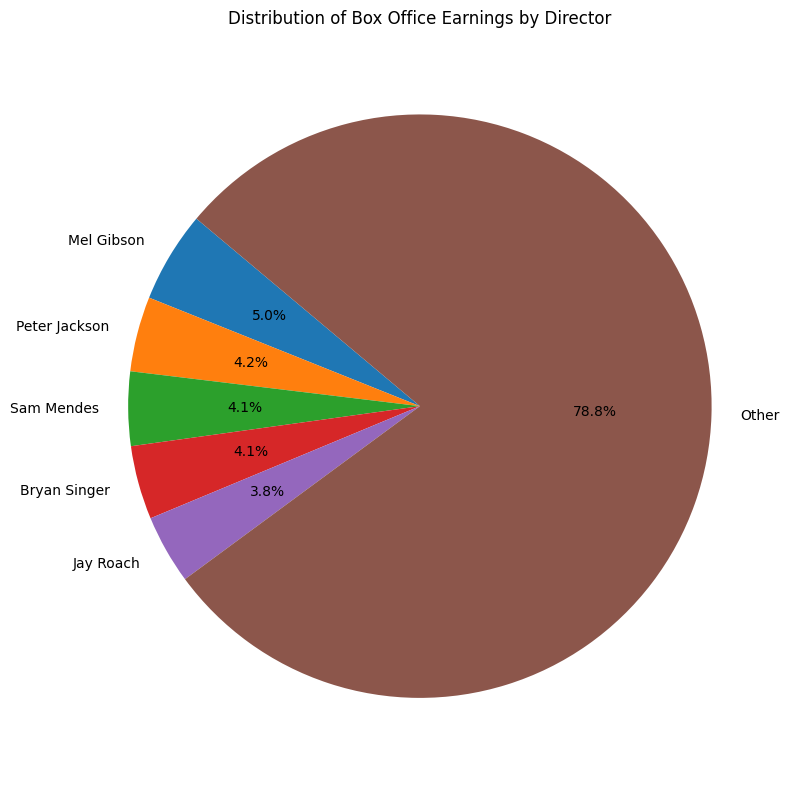

In [217]:
# To plot directors against box office revenue
# Group data by director and sum the box office earnings
total_box_office_per_director = df1.groupby('director')['box_office'].sum()

# Sort the directors by box office earnings in descending order
sorted_directors = total_box_office_per_director.sort_values(ascending=False)

# Select the top 5 directors with the highest box office earnings
top_5_directors = sorted_directors.head(5)

# Lump up the box office earnings of the remaining directors into an "Other" category
other_director_box_office = sorted_directors[5:].sum()

# Create a new Series with the top 5 directors and the lumped "Other" category
top_directors_and_other = top_5_directors.append(pd.Series(other_director_box_office, index=['Other']))

# Plot a pie chart for directors
plt.figure(figsize=(8, 8))
plt.pie(top_directors_and_other, labels=top_directors_and_other.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Box Office Earnings by Director')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

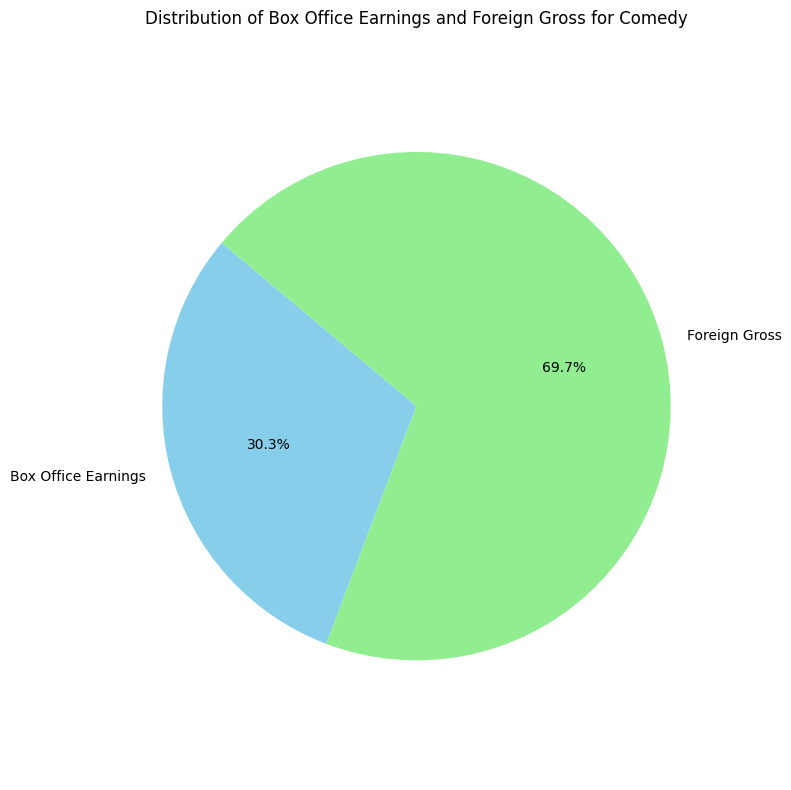

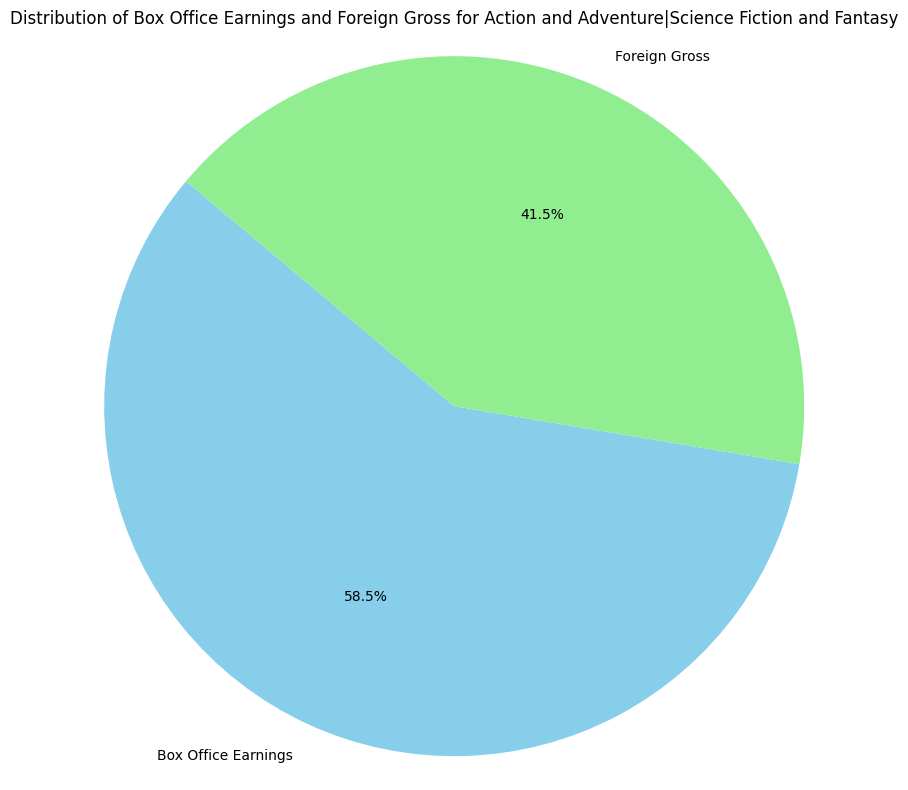

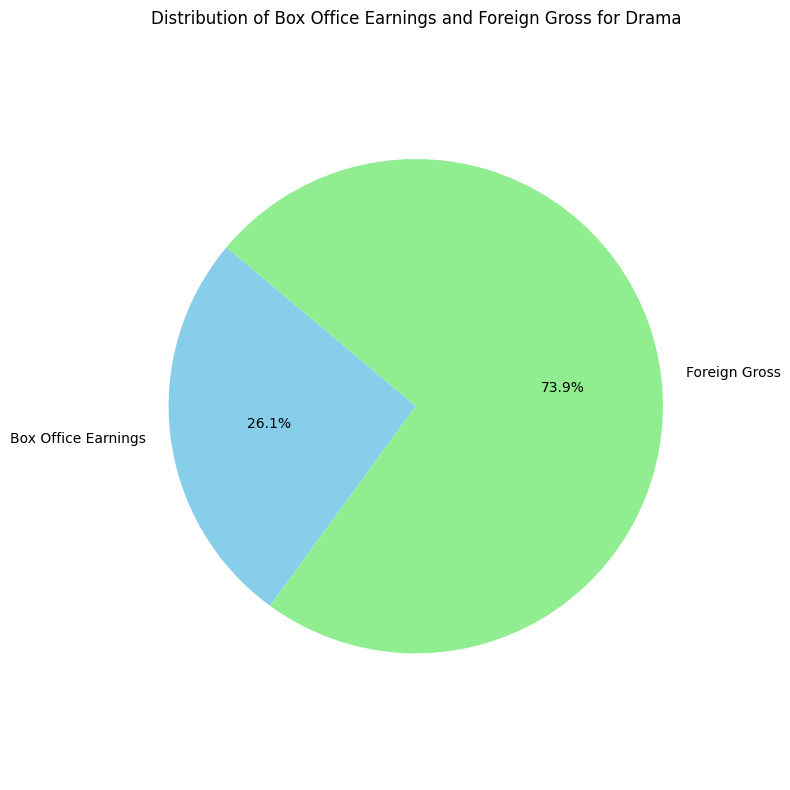

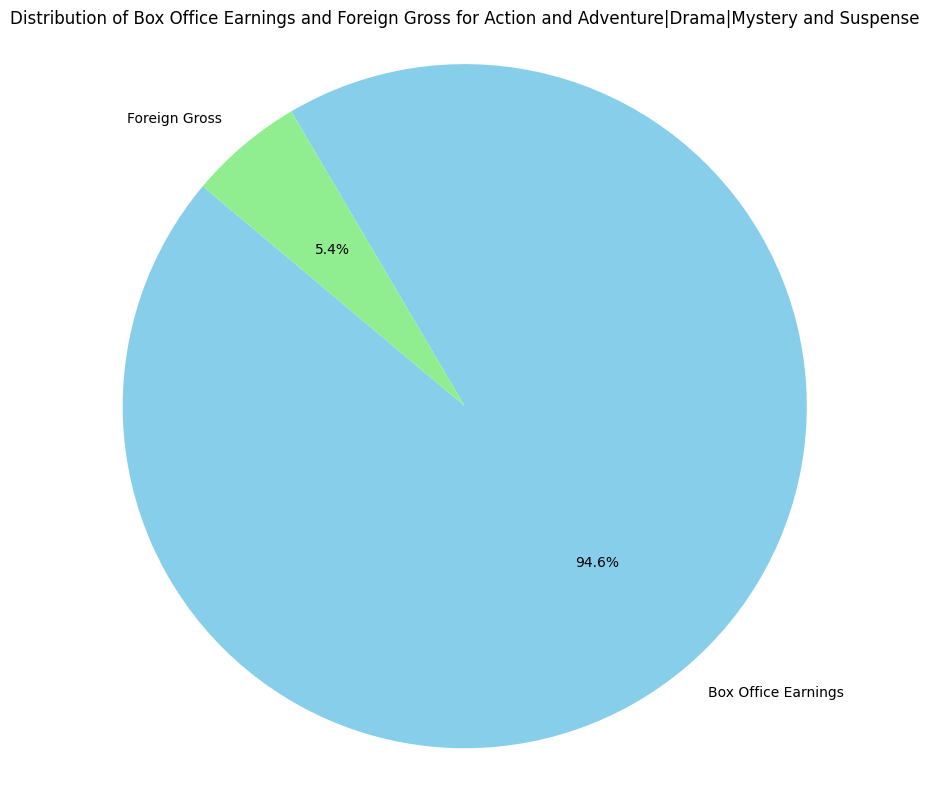

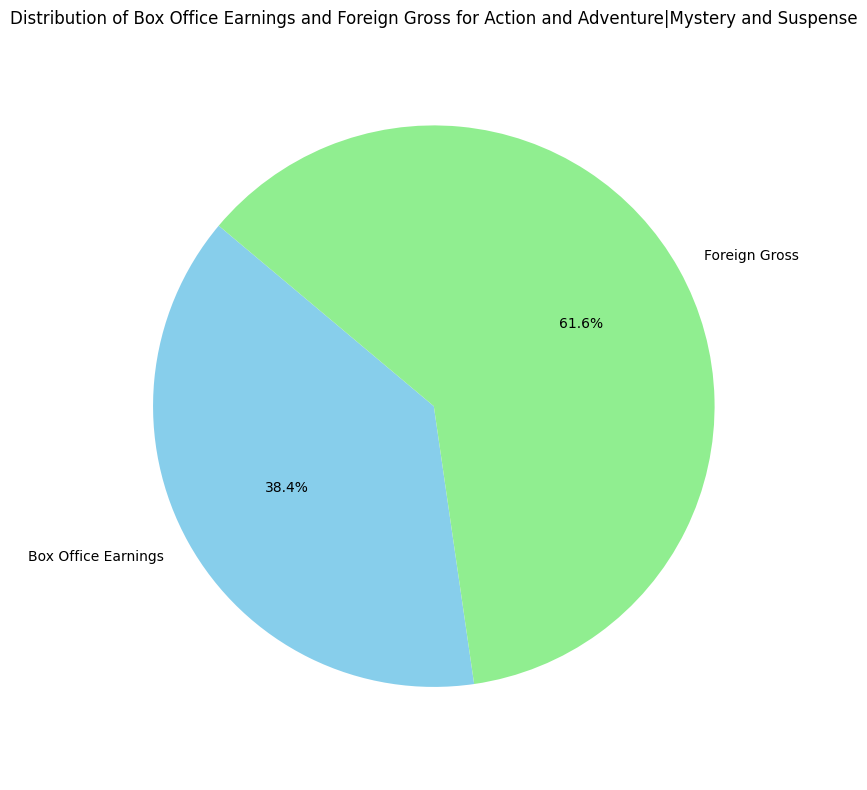

In [222]:
# Box_office versus foreign gross per genre
# Group data by genre and select the top 5 genres with the highest box office earnings
top_5_genres = df1.groupby('genre')['box_office'].sum().nlargest(5).index

# Create individual pie charts for each genre
for genre in top_5_genres:
    genre_data = df1[df1['genre'] == genre]
    total_box_office = genre_data['box_office'].sum()
    total_foreign_gross = genre_data['foreign_gross'].sum()

    # Data for pie chart
    labels = ['Box Office Earnings', 'Foreign Gross']
    sizes = [total_box_office, total_foreign_gross]
    colors = ['skyblue', 'lightgreen']

    # Create pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of Box Office Earnings and Foreign Gross for {genre}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.tight_layout()
    plt.show()

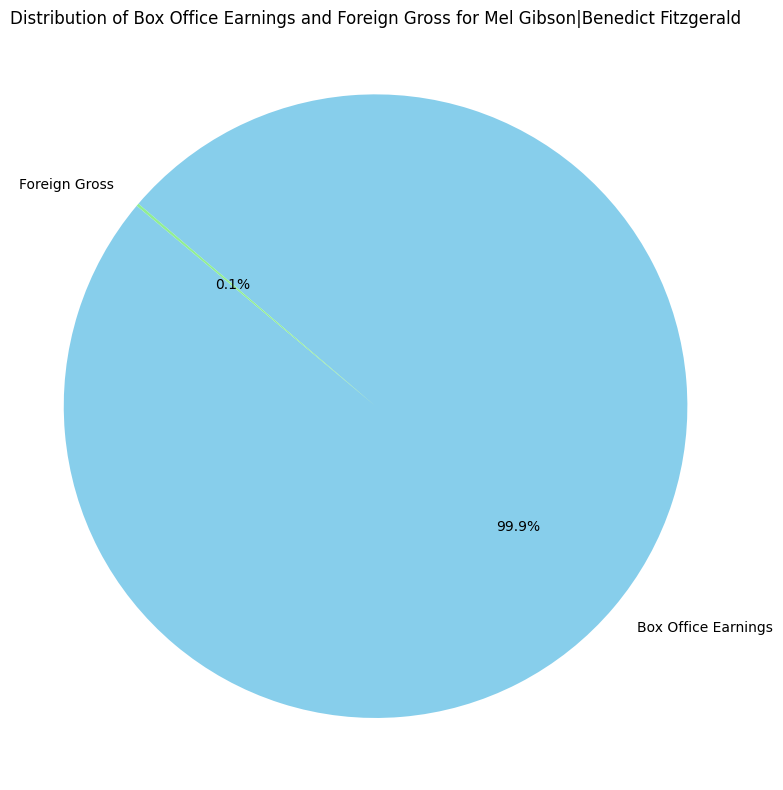

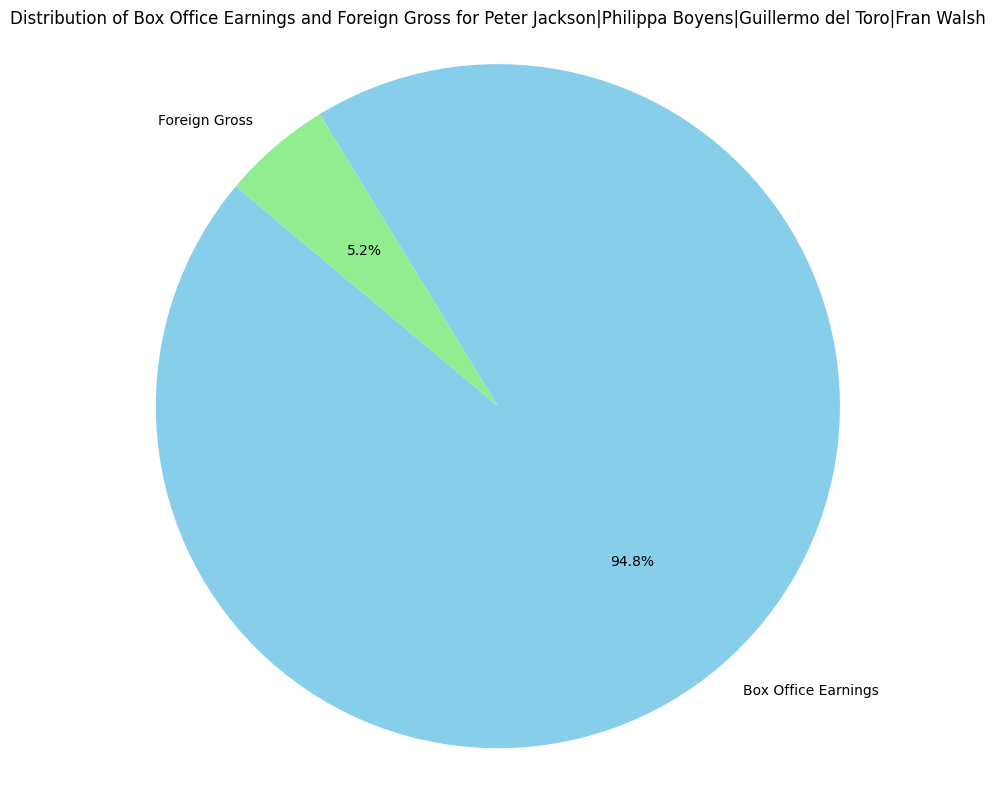

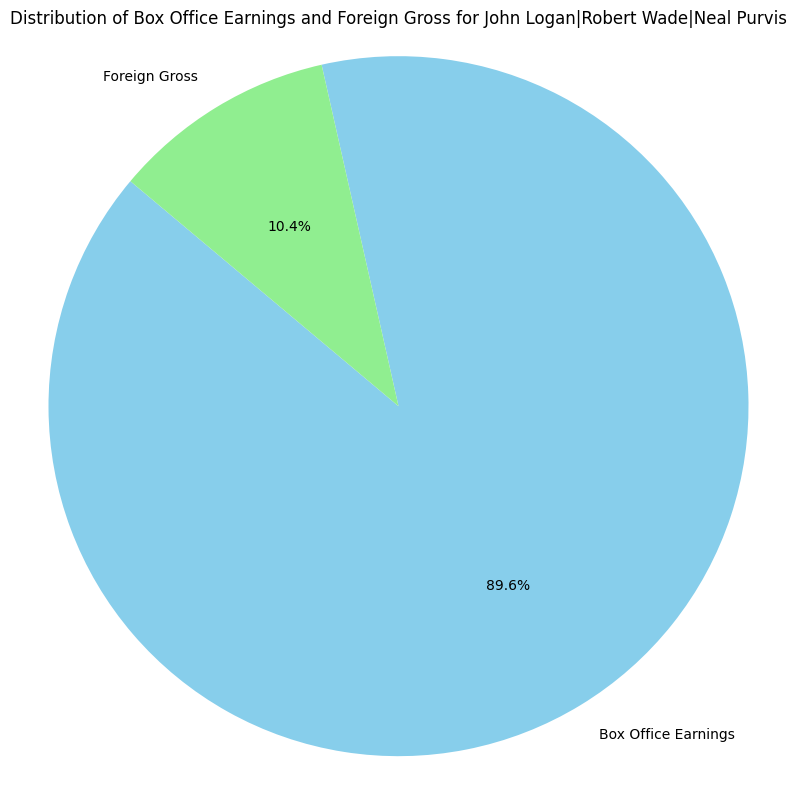

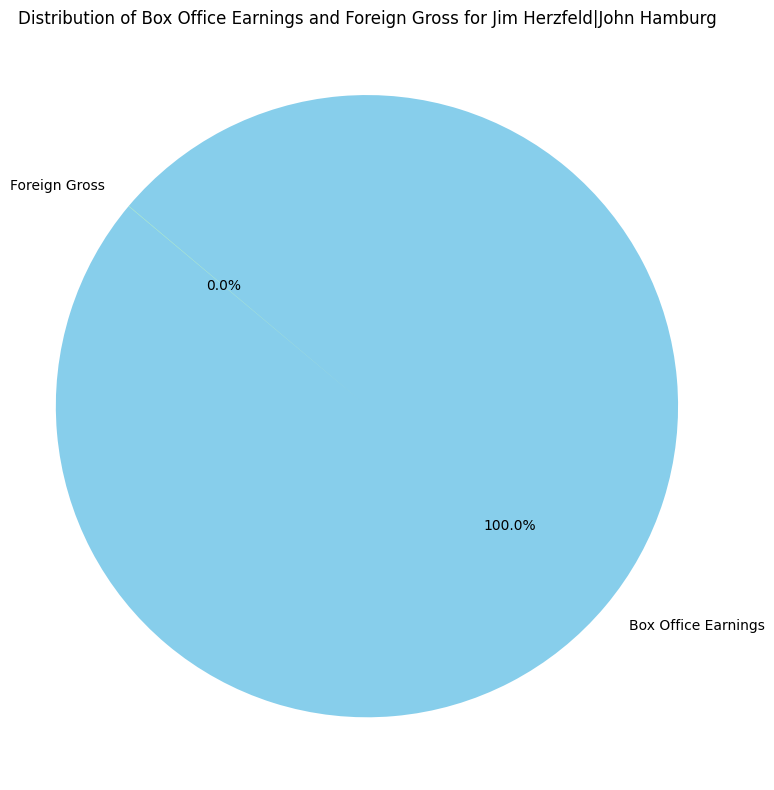

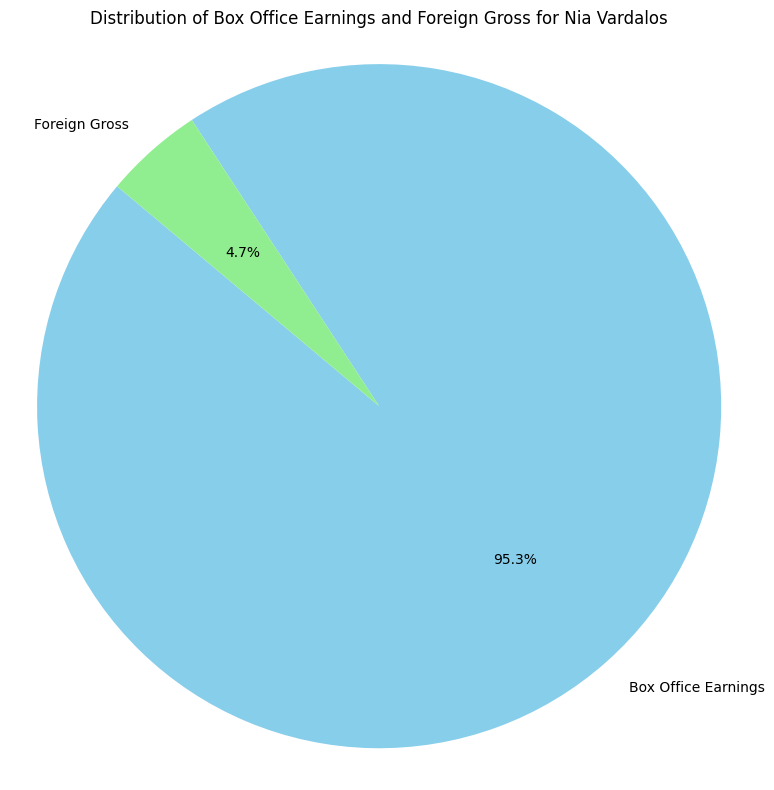

In [225]:
# Group data by writer and select the top 5 writers with the highest box office earnings
top_5_writers = df1.groupby('writer')['box_office'].sum().nlargest(5).index

# Create individual pie charts for each writer
for writer in top_5_writers:
    writer_data = df1[df1['writer'] == writer]
    total_box_office = writer_data['box_office'].sum()
    total_foreign_gross = writer_data['foreign_gross'].sum()

    # Data for pie chart
    labels = ['Box Office Earnings', 'Foreign Gross']
    sizes = [total_box_office, total_foreign_gross]
    colors = ['skyblue', 'lightgreen']

    # Create pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of Box Office Earnings and Foreign Gross for {writer}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.tight_layout()
    plt.show()

Box office and foreign gross are giving varing results. It is however essential to consider both, however, for this case since are looking at global markets, considering box office typically represent the revenue generated by a movie in theaters within a specific country or region, itcan miss out on foreign revenues thus it is better to use foreign gross.